In [23]:
# import the packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
from collections import Counter
from statistics import mode
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from haversine import haversine, Unit

# 1 Import data

In [2]:
# import the data into pandas dataframes
hvc_am0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AM0.csv", sep=";")
hvc_ar0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AR0.csv", sep=";")
hvc_customer_reviews = pd.read_csv("../ACRM-GROUP-13/data/HVC_CUSTOMER_REVIEWS.csv", sep=";")
hvc_depot = pd.read_csv("../ACRM-GROUP-13/data/HVC_DEPOT.csv", sep=";")
hvc_hvdayofweek = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVDAYOFWEEK.csv", sep=";")
hvc_hvposition = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVPOSITION_CORRECT.csv", sep=";")
hvc_hvroutetemplate = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVROUTETEMPLATE.csv", sep=";")
hvc_hvvisitoutcome = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITOUTCOME.csv", sep=";")
hvc_hvvisitresult = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITRESULT.csv", sep=";")
hvc_so0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_SO0.csv", sep=";")
hvc_visitresultdetails = pd.read_csv("../ACRM-GROUP-13/data/HVC_VISITRESULTDETAILS.csv", sep=";")

In [3]:
#Data conversion
hvc_hvdayofweek["HVDAYOFWEEK_NRID"] = hvc_hvdayofweek["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"] = hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"] = hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["WEEKORDER"] = hvc_hvroutetemplate["WEEKORDER"].astype(int)
hvc_hvvisitoutcome["HVOUTCOME_NRID"] = hvc_hvvisitoutcome["HVOUTCOME_NRID"].astype(int)
hvc_visitresultdetails["HVVISITRESULT_NRID"] = hvc_visitresultdetails["HVVISITRESULT_NRID"].astype(int)
hvc_so0["SO0_NRID"] = hvc_so0["SO0_NRID"].astype(int)
hvc_so0["HVROUTETEMPLATE_NRID"] = hvc_so0["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvvisitresult["DATEONLY"] = pd.to_datetime(hvc_hvvisitresult["DATEONLY"])
hvc_hvvisitresult["VISITDATE"] = pd.to_datetime(hvc_hvvisitresult["VISITDATE"])

# 2 Advanced Analysis

## 2.1 Does the weather / seasonal changes have an effect on the total revenue?

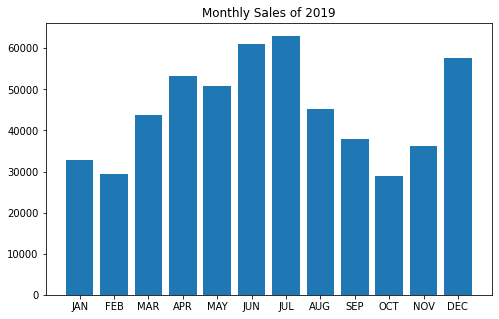

In [37]:
# get the month of each transaction date and store it in new column
hvc_hvvisitresult["MONTH"] = hvc_hvvisitresult["DATEONLY"].apply(lambda x: x.month)

# get transactions from 2020 only
transactions_2019 = hvc_hvvisitresult[(hvc_hvvisitresult["DATEONLY"] >= pd.Timestamp(year=2019, day=1, month=1)) & (hvc_hvvisitresult["DATEONLY"] < pd.Timestamp(year=2020, month=1, day=1))]

# get transactions with succesfull outcome
transactions_2019 = transactions_2019[transactions_2019["HVOUTCOME_NRID"] == 2]

# get the total sales for each month
monthly_sales = transactions_2019.groupby("MONTH")["AMOUNT"].sum().reset_index()

# plot barplot

# define figure canvas
plt.figure(figsize=(8, 5))
# plot barplot
plt.bar(x=range(12), height=monthly_sales["AMOUNT"])
# set xticks as the first three letters of the name of each month
month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
plt.xticks(range(12), month_names)
# define title
plt.title("Monthly Sales of 2019")
plt.show()

## 2.2 Which customers should be rewarded?

In [ ]:
# Ones with highest clv

## 2.3 Which employees should be rewarded?

In [38]:
# What are the routes of the employees?
hvc_hvvisitresult_so0 = pd.merge(hvc_hvvisitresult, hvc_so0)
hvc_hvvisitresult_so0

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM,MONTH,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE,SEASON_TYPE
0,55681456,719952,23186288605042,2,2021-10-22 12:20:01,2019-05-06,16.9,cash,5,219019962,Private,3950,nl-BE,All time
1,55248854,719952,23186288605042,2,2021-10-22 12:46:43,2019-04-22,7.4,cash,4,219019962,Private,3950,nl-BE,All time
2,54761459,719952,23186288605042,2,2021-10-22 12:32:05,2019-04-08,7.4,cash,4,219019962,Private,3950,nl-BE,All time
3,54331949,719952,23186288605042,1,2021-10-22 12:43:03,2019-03-25,0.0,NaN,3,219019962,Private,3950,nl-BE,All time
4,54354469,719952,23186288605042,2,2021-10-22 17:14:48,2019-03-25,16.9,cash,3,219019962,Private,3950,nl-BE,All time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240410,73920012,25528089708344,19946584592834,1,2021-10-22 14:51:54,2020-12-28,0.0,NaN,12,289757472,Private,3640,nl-BE,All time
240411,72237680,25624580427646,24034952445848,1,2021-10-22 17:42:52,2020-11-03,0.0,NaN,11,289658600,Private,3500,nl-BE,All time
240412,72976174,25616776446438,19946584592834,2,2021-10-22 12:13:03,2020-11-30,7.1,cash,11,289757472,Private,3960,nl-BE,All time
240413,73751793,73260813,18934048107254,2,2021-10-22 14:17:42,2020-12-20,35.6,cash,12,289416949,Private,3580,nl-BE,All time


In [41]:
#What is the turnover for each employ?
hvc_am0_hvvisitresult = pd.merge(hvc_am0 , hvc_hvvisitresult)

agg_dict = {"AMOUNT": np.sum}
hvc_employee = hvc_am0_hvvisitresult.groupby("NAME").agg(agg_dict)
hvc_employee_sorted=hvc_employee.sort_values(by = "AMOUNT",ascending=False)

In [42]:
hvc_employee_sorted.head(5)

,AMOUNT
NAME,
VAN HECKE jan,286009.10
PEETERS michel,265728.55
BUFFEL Sandy,186259.10
VERRESEN Dirk,94536.60
VERSTRAETE Erik,54292.00


In [43]:
hvc_employee_sorted.tail(5)

,AMOUNT
NAME,
DE TREMERIE Dimitri,15.1
MORTIER Magda,8.1
VAN AALST Sofie,5.3
DE SANTE tom,0.0
HEYNDRICKX Wim,0.0


In [44]:
hvc_employee_sorted

,AMOUNT
NAME,
VAN HECKE jan,286009.10
PEETERS michel,265728.55
BUFFEL Sandy,186259.10
VERRESEN Dirk,94536.60
VERSTRAETE Erik,54292.00
MATTIJS stijn,47835.50
DE PAUW Kim,46556.10
KERCKAERT Pieter,20819.00
CLAUS David,16934.75


In [45]:
##the employees that generate the most revenue (>10000)

hvc_employee_sorted_rewarded = hvc_employee_sorted[hvc_employee_sorted["AMOUNT"]>10000.0]
hvc_employee_sorted_rewarded


,AMOUNT
NAME,
VAN HECKE jan,286009.10
PEETERS michel,265728.55
BUFFEL Sandy,186259.10
VERRESEN Dirk,94536.60
VERSTRAETE Erik,54292.00
MATTIJS stijn,47835.50
DE PAUW Kim,46556.10
KERCKAERT Pieter,20819.00
CLAUS David,16934.75


In [46]:
# employees with excellent and good reviews

hvc_hvvisitresult_customer_reviews = pd.merge(hvc_hvvisitresult, hvc_customer_reviews)
hvc_hvvisitresult_customer_reviews

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM,MONTH,REVIEW
0,55681456,719952,23186288605042,2,2021-10-22 12:20:01,2019-05-06,16.9,cash,5,"Good service, satisfied"
1,55248854,719952,23186288605042,2,2021-10-22 12:46:43,2019-04-22,7.4,cash,4,"Good service, satisfied"
2,54761459,719952,23186288605042,2,2021-10-22 12:32:05,2019-04-08,7.4,cash,4,"Good service, satisfied"
3,54331949,719952,23186288605042,1,2021-10-22 12:43:03,2019-03-25,0.0,NaN,3,"Good service, satisfied"
4,54354469,719952,23186288605042,2,2021-10-22 17:14:48,2019-03-25,16.9,cash,3,"Good service, satisfied"
...,...,...,...,...,...,...,...,...,...,...
219155,73920012,25528089708344,19946584592834,1,2021-10-22 14:51:54,2020-12-28,0.0,NaN,12,No opinion
219156,72237680,25624580427646,24034952445848,1,2021-10-22 17:42:52,2020-11-03,0.0,NaN,11,No opinion
219157,72976174,25616776446438,19946584592834,2,2021-10-22 12:13:03,2020-11-30,7.1,cash,11,"Good service, satisfied"
219158,73751793,73260813,18934048107254,2,2021-10-22 14:17:42,2020-12-20,35.6,cash,12,"Excellent service, very satisfied"


In [47]:
#aantal value_counts in een array
hvc_hvvisitresult_customer_reviews_counts = hvc_hvvisitresult_customer_reviews.value_counts("REVIEW")
hvc_hvvisitresult_customer_reviews_counts


REVIEW
Good service, satisfied               99107
No opinion                            84570
Not completely satisfied              16793
Excellent service, very satisfied     16736
Very bad service, very unsatisfied     1954
dtype: int64

In [48]:
hvc_am0_hvc_hvvisitresult_customer_reviews = pd.merge(hvc_am0 , hvc_hvvisitresult_customer_reviews)
#Alle waarden omzetten in getallen op een schaal van 4 
hvc_am0_hvc_hvvisitresult_customer_reviews_new = hvc_am0_hvc_hvvisitresult_customer_reviews.replace({"No opinion":2.5,"Very bad service, very unsatisfied":1,"Not completely satisfied":2,"Good service, satisfied":3,"Excellent service, very satisfied":4})
#Gemiddelde score + std berekenen per werknemer op 4
agg_dict = {"REVIEW":[np.mean,np.std,np.sum]}
hvc_am0_hvc_hvvisitresult_customer_reviews_new.groupby("NAME").agg(agg_dict)

REVIEW                    
                         mean       std       sum
NAME                                             
BALLINGS Hendrik     2.872273  0.448446    4081.5
BUFFEL Sandy         2.841452  0.474481  112817.0
CABOOTER Dries       3.000000       NaN       3.0
CLAEYS Liebeth       2.793839  0.489324     589.5
CLAUS David          2.639166  0.517027   10828.5
DE BAERE Sonja       2.500000  0.000000      37.5
DE BRUYNE Charlotte  2.775758  0.473186    1374.0
DE BRUYNE Chris      2.807692  0.478058     584.0
DE CONINCK Marnik    2.532819  0.492748    1968.0
DE MILT Tomas        2.915730  0.512547     259.5
DE PAUW Kim          2.911927  0.492096   43213.0
DE SANTE tom         2.500000  0.000000      12.5
DE SMET Stijn        2.530527  0.498744    3937.5
DE TREMERIE Dimitri  2.500000  0.000000      10.0
DESTORME Frederik    2.500000  0.000000      12.5
HEYNDRICKX Wim       2.500000  0.000000      25.0
JACOBS Michel        2.500000  0.000000      52.5
JANNSENS Eddy        2.581427  0.528594    1918.0
KERCKAERT Pieter     2.823581  0.507393   16069.0
MATTIJS stijn        2.825686  0.420471   22970.0
MORTIER Magda        2.500000  0.000000       5.0
PAUWELS Jeffrey      2.813016  0.479253    3069.0
PEETERS michel       2.542418  0.505449  123920.0
QUINTEN Patrick      3.000000  0.000000      63.0
STEEMAN Evy          2.522453  0.510084    2303.0
TACK Hann            2.861757  0.491963    4430.0
VAN AALST Sofie      3.000000  0.000000      24.0
VAN HECKE jan        2.874618  0.382479  143981.0
VAN HUFFEL Jan       2.918872  0.509168    2536.5
VERLINDEN Elke       2.250000  0.353553       4.5
VERRESEN Dirk        2.897925  0.493478   59761.0
VERSTRAETE Erik      2.923758  0.504470   50370.5

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (219160).

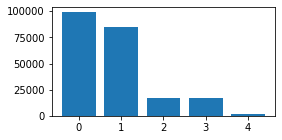

In [49]:
#bar plots maken
plt.figure(figsize=(4,2))
plt.bar(range(5),hvc_hvvisitresult_customer_reviews_counts)
plt.xticks(range(5),hvc_hvvisitresult_customer_reviews["REVIEW"])
plt.xlabel("review")
plt.ylabel("amount")
plt.show()


## 2.4 To which customers should the company send coupons in order to win them back?

In [51]:
#Amount of customers that give a bad review and that need a coupon to win them back.

amount_bad_reviews = len(hvc_customer_reviews[hvc_customer_reviews["REVIEW"] == "Very bad service, very unsatisfied"]) + len(hvc_customer_reviews[hvc_customer_reviews["REVIEW"] == "Not completely satisfied"])

print(amount_bad_reviews)

479


In [52]:
# customers that give bad reviews

amount_bad_reviews

479

In [51]:
# customers that are visited but don’t buy anything
hvc_hvvisitresult_nothingneeded = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 0]
hvc_hvvisitresult_nothingneeded["SO0_NRID"].nunique()

5339

In [52]:
hvc_hvvisitresult_nothingneeded

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM
5,55673937,719757,23186288605042,0,2021-10-22 10:41:58,2019-05-06,0.0,NaN
7,55658274,719546,23186288605042,0,2021-10-22 17:03:06,2019-05-05,0.0,NaN
9,55714703,23486476203044,18934048107254,0,2021-10-22 21:29:10,2019-05-06,0.0,NaN
11,55714705,21494752587036,18934048107254,0,2021-10-22 21:29:16,2019-05-06,0.0,NaN
12,55714706,1252933,18934048107254,0,2021-10-22 21:29:19,2019-05-06,0.0,NaN
...,...,...,...,...,...,...,...,...
240392,58823353,1450635,19946584592834,0,2021-10-22 11:58:01,2019-08-03,0.0,NaN
240399,62781931,1452090,19946584592834,0,2021-10-22 18:52:42,2019-12-16,0.0,NaN
240400,66247085,1246061,25532744515046,0,2021-10-22 12:58:08,2020-04-20,0.0,NaN
240404,67034085,880150,19946584592834,0,2021-10-22 13:38:27,2020-05-16,0.0,NaN


In [58]:
print(hvc_hvvisitresult_nothingneeded.groupby("SO0_NRID").agg({"HVVISITRESULT_NRID": np.absolute}))




#agg_dict = {"AR0_NRID": np.absolute}
#hvc_visitresultdetails_correlatedproducts = hvc_visitresultdetails.groupby("HVVISITRESULT_NRID").agg(agg_dict)

ValueError: Must produce aggregated value

## 2.5 Are there factors that the company can change in order to decrease the churning rate?

In [55]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Summer': pd.date_range(start='21/06/'+year, end='20/09/'+year),
               'Autumn': pd.date_range(start='21/09/'+year, end='20/12/'+year)}
    if date in seasons['Spring']:
        return 'Spring'
    if date in seasons['Summer']:
        return 'Summer'
    if date in seasons['Autumn']:
        return 'Autumn'
    else:
        return 'Winter'

In [56]:
#Check if the customer is visited at the right moment
#comparing amounts of open door but no purchase on a certain date with the preferred time for visits

hvc_hvvisitresult_nothingneeded.drop(axis = 1,labels = "PAYMENTTERM")

hvc_hvvisitresult_nothingneeded_so0 = pd.merge(hvc_hvvisitresult_nothingneeded, hvc_so0, on = "SO0_NRID")

hvc_hvvisitresult_nothingneeded_so0.drop(axis = 1, labels = "PAYMENTTERM")

#Christmas
hvc_hvvisitresult_nothingneeded_so0_christmas = hvc_hvvisitresult_nothingneeded_so0[hvc_hvvisitresult_nothingneeded_so0["SEASON_TYPE"] == "Christmas"]

christmas_false = []
for index, row in hvc_hvvisitresult_nothingneeded_so0_christmas.iterrows():
    if(row.DATEONLY.month != 12):
        christmas_false.append(index)
christmas_wrongproportion = int((len(christmas_false)/len(hvc_hvvisitresult_nothingneeded_so0_christmas)*100))
print("Christmas: ", christmas_wrongproportion)

#Function
def season_proportion(season):
    hvc_hvvisitresult_nothingneeded_so0_Season = hvc_hvvisitresult_nothingneeded_so0[hvc_hvvisitresult_nothingneeded_so0["SEASON_TYPE"] == season]

    Season_false = []
    for index, row in hvc_hvvisitresult_nothingneeded_so0_Season.iterrows():
        if(season_of_date(row.DATEONLY) == season):
            Season_false.append(index)
    Season_wrongproportion = int((len(Season_false)/len(hvc_hvvisitresult_nothingneeded_so0_Season)*100))
    print(season + ": ", Season_wrongproportion)
    return Season_wrongproportion
    
    
summer_wrongproportion = season_proportion("Summer")
winter_wrongproportion = season_proportion("Winter")

Christmas:  89
Summer:  25
Winter:  0


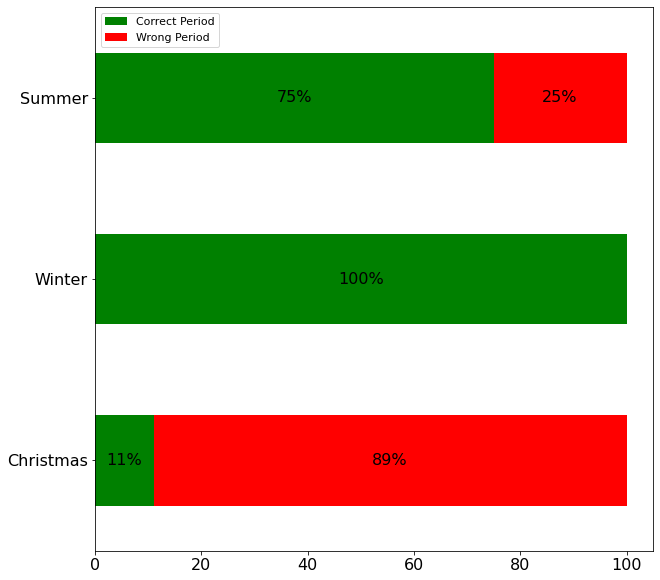

In [57]:
## Making a horizontal stacked bar chart
from matplotlib.colors import LinearSegmentedColormap

#making a df
data = [['Christmas', 100 - christmas_wrongproportion, christmas_wrongproportion], ['Winter', 100 - winter_wrongproportion, winter_wrongproportion], ['Summer', 100 - summer_wrongproportion, summer_wrongproportion]]
df = pd.DataFrame(data, columns = ['Season_Types', 'Wrong_Period',"Correct_Period"])

## making plot
ax = df.plot(kind='barh', stacked=True, figsize=(10, 10), color = ["green","red"])

for c in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.0f}%' if (w := v.get_width()) > 0 else '' for v in c ]
    
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center', fontsize = 16)
    
    
ax.legend(["Correct Period", "Wrong Period"],loc="upper left", fontsize = 11)
plt.xticks([0,20,40,60,80,100], fontsize = 16)
plt.yticks(np.arange(3), df["Season_Types"], fontsize = 16)
plt.savefig('./data/Correct_Visit_Period.png')
plt.show()

In [33]:
# Turnover customers
hvc_hvvisitresult_nothingneeded = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 0]
visit_turnover = (len(hvc_hvvisitresult_nothingneeded)/len(hvc_hvvisitresult))*100
visit_turnover

38.99715076014392

In [59]:
# check if the customer closed door is visited between 9 and 17

hvc_hvvisitresult_nothome = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 1]
hvc_hvvisitresult_nothome.drop(axis = 1,labels = "PAYMENTTERM")

Correct_Time = []
Wrong_Time = []

starttime= datetime.time(9,0,0)
endtime = datetime.time(17,0,0)

for index, row in hvc_hvvisitresult_nothome.iterrows():
    if(row.VISITDATE.time() > starttime and row.VISITDATE.time() < endtime):
        Wrong_Time.append(index)
Wrong_Time_proportion = int(100*(len(Wrong_Time)/len(hvc_hvvisitresult_nothome)))
print(Wrong_Time_proportion)

81


## 2.6 Would it be valuable to recommend (upsell / cross sell) products to a customer?

## 2.7 Which employees should be assigned to different routes?

In [33]:
#making new dataframes
hvc_customer_regions = pd.merge(hvc_so0,hvc_hvroutetemplate)
hvc_customer_regions2 = pd.merge(hvc_customer_regions, hvc_hvposition, on = "SO0_NRID")
hvc_customer_routes = pd.merge(hvc_hvroutetemplate, hvc_so0)
hvc_employee_route_region = pd.merge(pd.merge(hvc_so0, hvc_hvroutetemplate, on = "HVROUTETEMPLATE_NRID"), hvc_hvvisitresult)
hvc_routes_per_employeename = pd.merge(hvc_employee_route_region, hvc_am0)
hvc_depot_region = pd.merge(hvc_depot, hvc_employee_route_region)

In [124]:
#which employee is active in which region
agg_dict = {"REGION": np.unique}
hvc_employee_route_region_grouped = hvc_employee_route_region.groupby("AM0_NRID").agg(agg_dict)
hvc_employee_region_name = pd.merge(hvc_employee_route_region_grouped, hvc_am0, on = "AM0_NRID")

#show dataframe
hvc_employee_region_name[["NAME", "REGION"]]

,NAME,REGION
0,QUINTEN Patrick,C17
1,DE MILT Tomas,C04
2,VAN HECKE jan,"[B02, C17]"
3,DE SANTE tom,B02
4,PEETERS michel,B25
5,BALLINGS Hendrik,"[C04, C17]"
6,MATTIJS stijn,C17
7,DE BAERE Sonja,B25
8,VAN AALST Sofie,C04
9,VAN HUFFEL Jan,"[C04, C17]"


In [46]:
#shows with regions are served by depot x
def depot_per_region(depot):
    return hvc_depot_region[hvc_depot_region["DEPOT"] == depot]["REGION"].value_counts(normalize = True)

In [47]:
depot_per_region("Deinze")

C04    0.812923
B25    0.103776
B02    0.083301
Name: REGION, dtype: float64

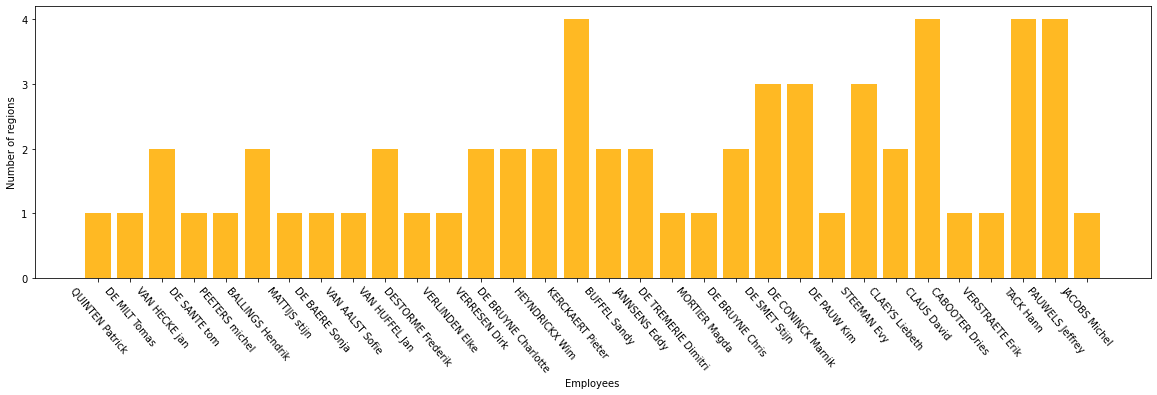

In [195]:
#plot al the employees with the number of regions they are assigned to
plt.figure(figsize= (20,5))
plt.bar(hvc_employee_region_name["NAME"],[1,1,2,1,1,2,1,1,1,2,1,1,2,2,2,4,2,2,1,1,2,3,3,1,3,2,4,1,1,4,4,1], color = "#ffb923")

plt.xlabel("Employees")
plt.ylabel("Number of regions")
plt.xticks(rotation = 310)
plt.yticks(range(0,5))

#plt.savefig("./data/fig_numbersofregions_per_employee.eps")
plt.show()

In [5]:
#employee x has route x that is in region x
hvc_employee_routeinregion_onname= pd.merge(hvc_employee_route_region, hvc_am0, on = "AM0_NRID")#["REGION"].value_counts()

def getroutesofemployee(employee):
    routes_of_employee = hvc_employee_routeinregion_onname[hvc_employee_routeinregion_onname["NAME"] == employee][["HVROUTETEMPLATE_NRID","REGION"]]["REGION"].value_counts()
    return routes_of_employee

In [107]:
getroutesofemployee("CLAUS David")

B25    3478
C04     745
C17     178
B02     106
Name: REGION, dtype: int64

In [122]:
#Which routes does employee x have in region x
def getroutesofemployeeinregion(employee_id,region):
    employee_route_df = hvc_employee_route_region[hvc_employee_route_region["REGION"] == region][["AM0_NRID", "HVROUTETEMPLATE_NRID"]].drop_duplicates()
    employee_route_df_2 = employee_route_df[employee_route_df["AM0_NRID"] == employee_id]
    return employee_route_df_2

In [7]:
#Which routes belong to which region
agg_dict = {"REGION": np.unique}
hvc_customer_regions3_grouped = hvc_customer_routes.groupby("HVROUTETEMPLATE_NRID").agg(agg_dict)

def getregionofroute(route):
    region = hvc_customer_regions3_grouped[hvc_customer_regions3_grouped.index == route]["REGION"]
    return region

In [8]:
getregionofroute(219018687)

HVROUTETEMPLATE_NRID
219018687    C04
Name: REGION, dtype: object

In [9]:
#all the routes of all the employees who are active
hvc_employee_routeinregion_onname_grouped = hvc_employee_routeinregion_onname.groupby("NAME")["HVROUTETEMPLATE_NRID"].unique()
hvc_employee_routeinregion_onname_grouped

NAME
BALLINGS Hendrik       [219021241, 219024456, 219023167, 219023811, 2...
BUFFEL Sandy           [289663610, 289756470, 289761480, 289755468, 2...
CABOOTER Dries                                               [289762482]
CLAEYS Liebeth              [219021241, 219024456, 219021882, 289655594]
CLAUS David            [219020601, 219021241, 219024456, 219021882, 2...
DE BAERE Sonja                                               [289758474]
DE BRUYNE Charlotte    [289663610, 289763484, 289758474, 289661606, 2...
DE BRUYNE Chris             [219021241, 219024456, 219021882, 289661606]
DE CONINCK Marnik      [219021241, 219024456, 289761480, 289755468, 2...
DE MILT Tomas                                                [219019324]
DE PAUW Kim            [219020601, 219021241, 219024456, 219021882, 2...
DE SANTE tom                                                 [289413943]
DE SMET Stijn          [219020601, 219021882, 289756470, 289761480, 2...
DE TREMERIE Dimitri                           

In [5]:
route_id = 289416949
employee_id = 18934048107254

In [6]:
cust_routes = pd.merge(hvc_hvposition, hvc_so0)
cust_route_location = cust_routes[cust_routes["HVROUTETEMPLATE_NRID"] == route_id][["LONG", "LAT"]].drop_duplicates()

In [37]:
#read the map of Belgium
belgium_df = pd.read_csv("./data/zipcode-belgium.csv", header = None)
belgium_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]
#read the depots
depots_df = pd.read_csv("./data/HVC_DEPOT.csv", sep=";")

In [9]:
#get depot of route x
depot_city = depots_df[depots_df["HVROUTETEMPLATE_NRID"] == route_id]["DEPOT"].iloc[0]
#get depot coordinates
depot_location = belgium_df[belgium_df["LOCATION"] == depot_city][["LONG", "LAT"]].drop_duplicates()

In [8]:
#get location of employee
employee_city = hvc_am0[hvc_am0["AM0_NRID"] == employee_id]["LOCATION"].iloc[0]
# get employee coordinates
employee_location = belgium_df[belgium_df["LOCATION"] == employee_city].drop_duplicates()

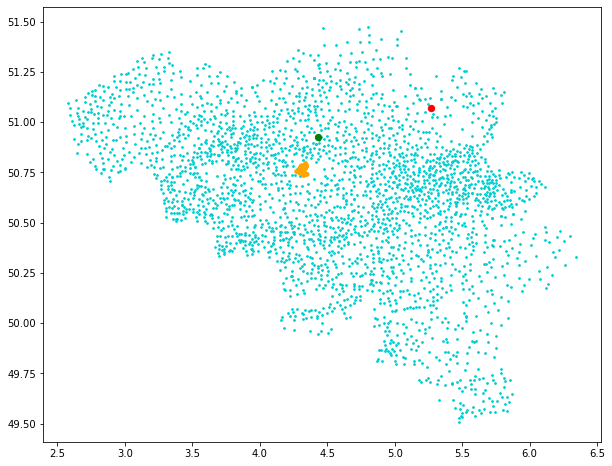

In [10]:
#plot the location of the employee, his depot and one of his routes on the map of Belgium
plt.figure(figsize=(10, 8))
plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s=3, color="darkturquoise")
plt.scatter(employee_location["LONG"], employee_location["LAT"], s=40, color="red")
plt.scatter(depot_location["LONG"], depot_location["LAT"], s=40, color="green")
plt.scatter(cust_route_location["LAT"], cust_route_location["LONG"], s=10, color="orange")

In [28]:
#Calculate the distance from the employee location to their depot
employee = (employee_location["LAT"], employee_location["LONG"]) # (lat, lon)
depot = (depot_location["LAT"], depot_location["LONG"])

haversine(employee, depot)

60.73763113750344

## 2.8 Which routes should be reassigned to different depots?

In [30]:
#read the map of Belgium
belgium_df = pd.read_csv("./data/zipcode-belgium.csv", header = None)
belgium_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]
#read the coordinates of the depots
data = {'DEPOT': ['Deinze', 'Antwerpen', 'Vilvoorde', 'Aarschot'], 'Long': [3.5235857, 4.4024643, 4.4257868,4.8365218], 'Lat' :[50.9875406,51.2194475,50.9272511,50.9859959]}  
data_depot = pd.DataFrame(data)  
data_depot

,DEPOT,Long,Lat
0,Deinze,3.523586,50.987541
1,Antwerpen,4.402464,51.219448
2,Vilvoorde,4.425787,50.927251
3,Aarschot,4.836522,50.985996


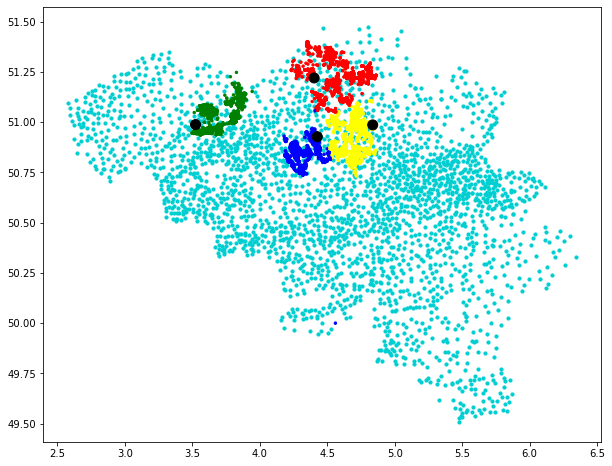

In [229]:
# initialize kmeans model with 4 clusters
km_model = KMeans(n_clusters=4)

# fit model on data
km_model.fit(hvc_hvposition[["LONG", "LAT"]])
plt.figure(figsize=(10, 8))

# get cluster labels for each customer
cluster_labels = km_model.predict(hvc_hvposition[["LONG", "LAT"]])

# define the colors for each cluster and a color for each customer
color_dict = {0: "yellow", 1: "green", 2: "red", 3 :'blue'}
cluster_colors = [color_dict[label] for label in cluster_labels]

# define the colors for each depot and a color for each depot
color_depot = {"Deinze": "black", "Antwerpen": "black", "Vilvoorde": "black", "Aarschot":  "black"}
cluster_depot = [color_depot[label] for label in data_depot["DEPOT"]]#in de juiste dataframe kijken om het depot te vinden

plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s= 10, color = "darkturquoise")
plt.scatter(hvc_hvposition["LAT"], hvc_hvposition["LONG"], color=cluster_colors, s=6)
plt.scatter(data_depot["Long"], data_depot["Lat"], color=cluster_depot, s = 100)

#plt.savefig("./data/fig_newregions_depots.jpeg")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

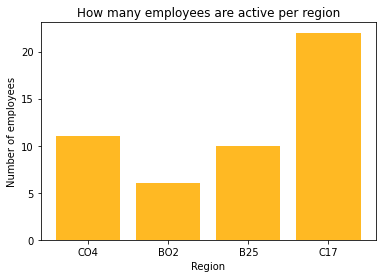

In [110]:
#How many times a region has been served
regions= ["CO4", "BO2", "B25", "C17"]
count = [11,6, 10, 22]

plt.bar(regions, count, color = "#ffb923")
plt.title('How many employees are active per region')
plt.xlabel("Region")
plt.ylabel("Number of employees")

#plt.savefig("./data/fig_employeesperregion.jpeg")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

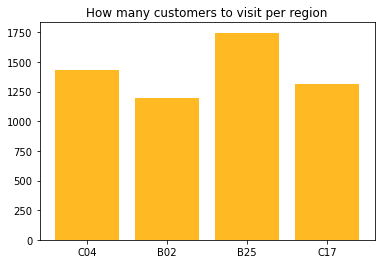

In [65]:
#How many customers to visiter per region
plt.title("How many customers to visit per region")
plt.bar(["C04", "B02","B25", "C17"] ,[1433,1199,1747,1318], color = "#ffb923")

#plt.savefig("./data.fig_customersperregion.jpeg")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

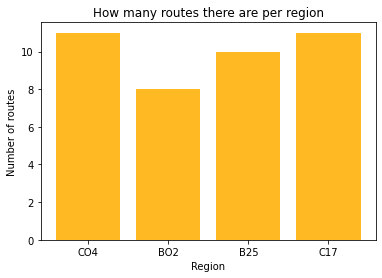

In [60]:
#How many routes there are per region
regions= ["CO4", "BO2", "B25", "C17"]
routes = [11,8, 10, 11]

plt.bar(regions, routes, color = "#ffb923")
plt.title('How many routes there are per region')
plt.xlabel("Region")
plt.ylabel("Number of routes")

#plt.savefig("./data/fig_routesperregion.jpeg")
plt.show

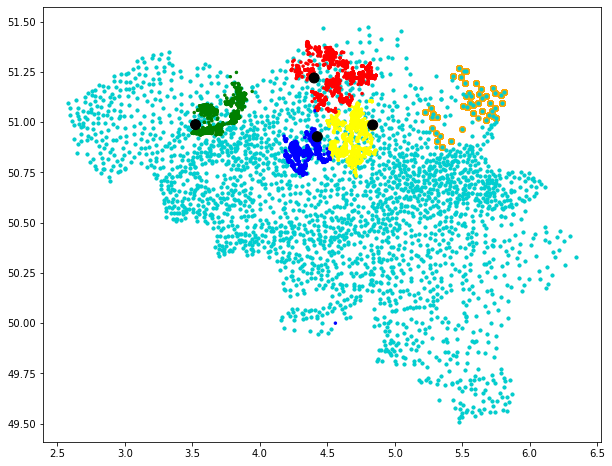

In [240]:
#employees locations with the depots and regions
hvc_customer_belgium = pd.merge(hvc_customer_regions,belgium_df, on = "POSTCODE")
hvc_customer_belgium
# initialize kmeans model with 4 clusters
km_model = KMeans(n_clusters=4)

# fit model on data
km_model.fit(hvc_hvposition[["LONG", "LAT"]])
plt.figure(figsize=(10, 8))

# get cluster labels for each customer
cluster_labels = km_model.predict(hvc_hvposition[["LONG", "LAT"]])

# define the colors for each cluster and a color for each customer
color_dict = {0: "yellow", 1: "green", 2: "red", 3 :'blue'}
cluster_colors = [color_dict[label] for label in cluster_labels]

# define the colors for each depot and a color for each depot
color_depot = {"Deinze": "black", "Antwerpen": "black", "Vilvoorde": "black", "Aarschot":  "black"}
cluster_depot = [color_depot[label] for label in data_depot["DEPOT"]]#in de juiste dataframe kijken om het depot te vinden

plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s= 5, color = "orange")
plt.scatter(hvc_customer_belgium["LONG"],hvc_customer_belgium["LAT"], s = 30, color = "orange")
plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s= 10, color = "darkturquoise")
plt.scatter(hvc_hvposition["LAT"], hvc_hvposition["LONG"], color=cluster_colors, s=6)
plt.scatter(data_depot["Long"], data_depot["Lat"], color=cluster_depot, s = 100)

plt.savefig("./data/fig_depots_and_employees.jpeg")
plt.show()

## 2.9 Which customers should be reassigned to different routes?

<ipython-input-35-b256644f210d>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


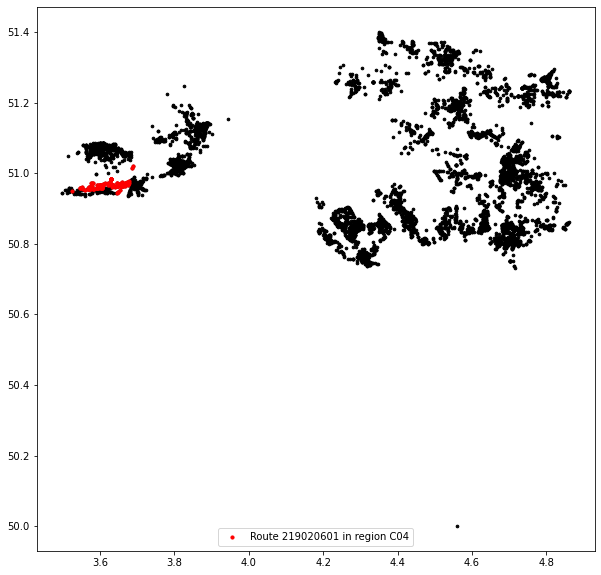

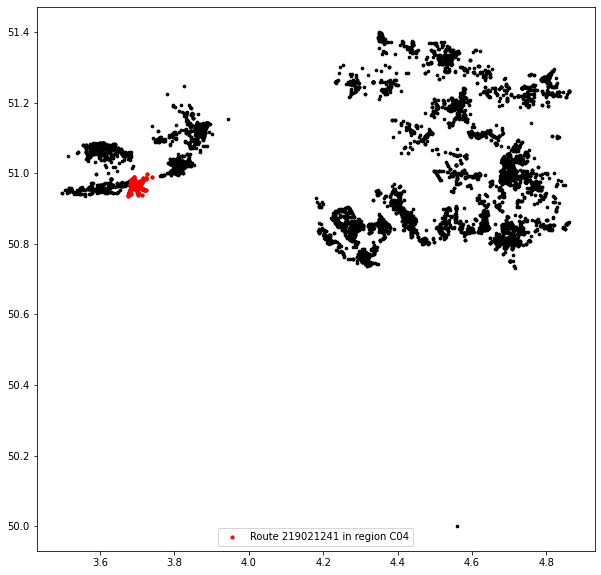

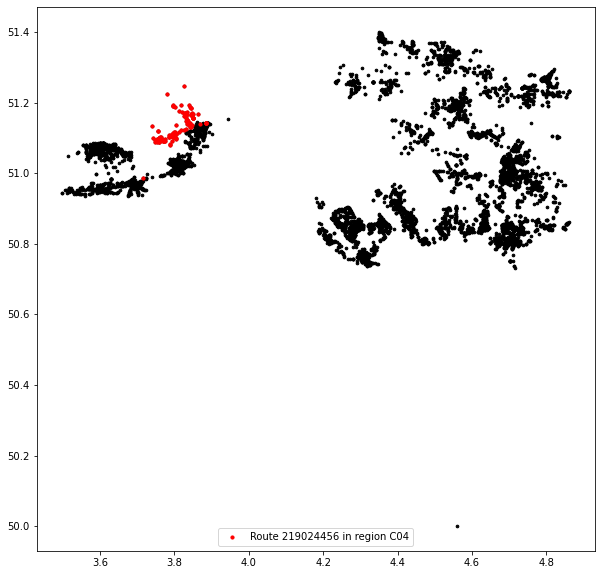

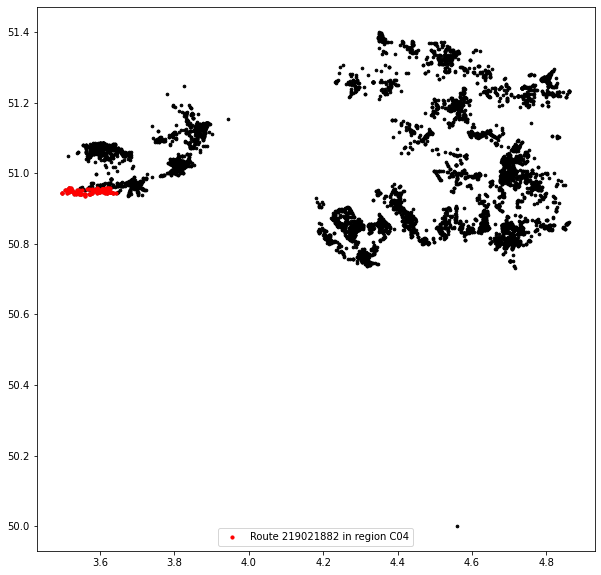

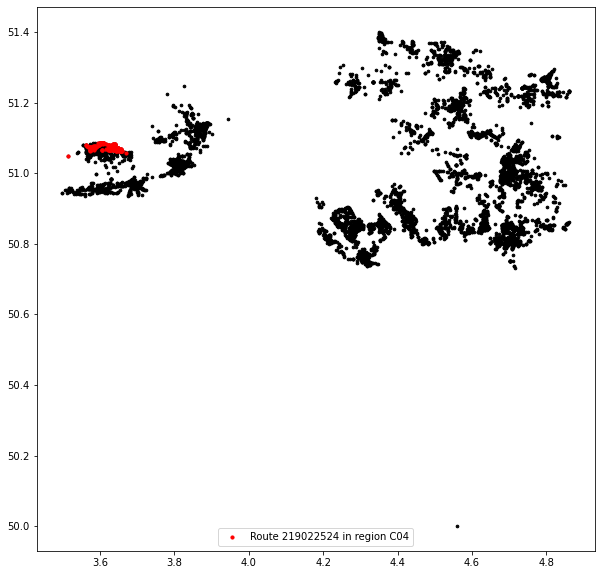

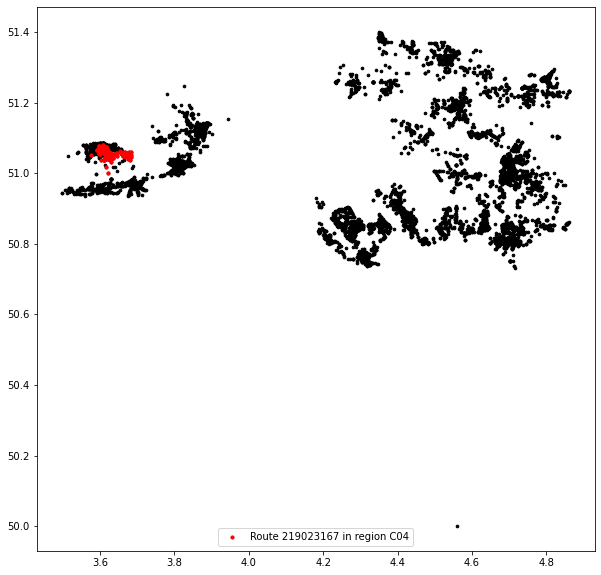

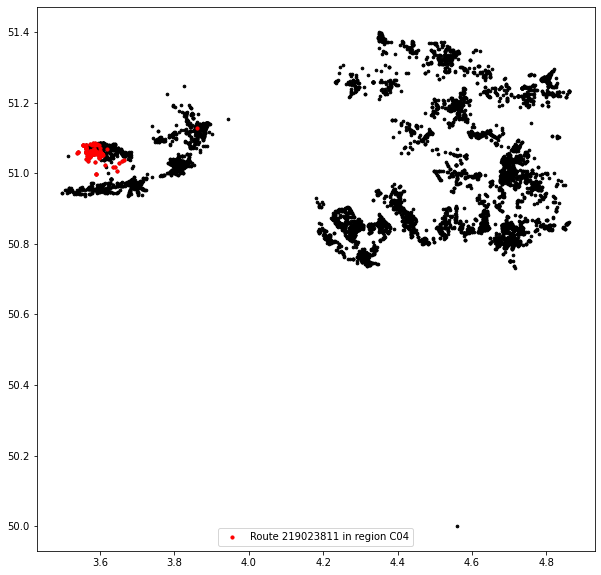

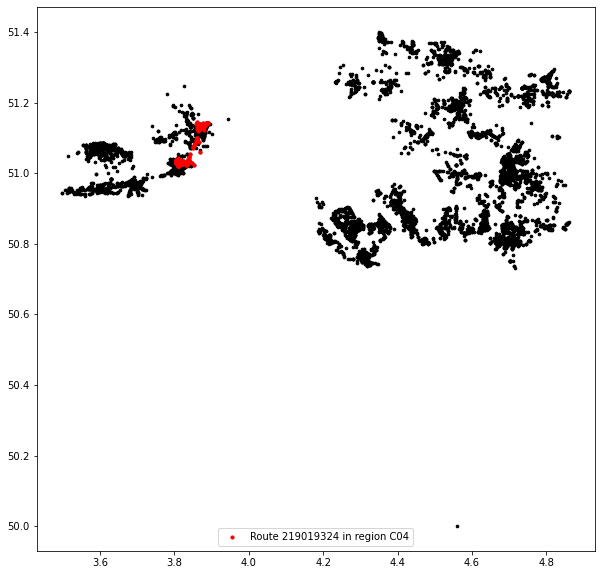

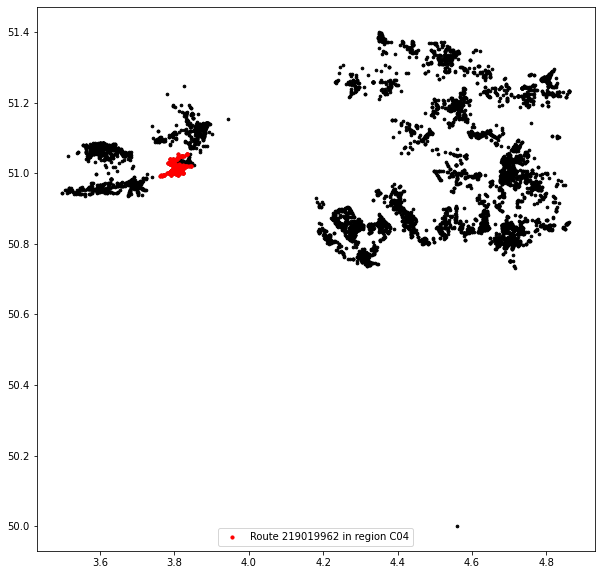

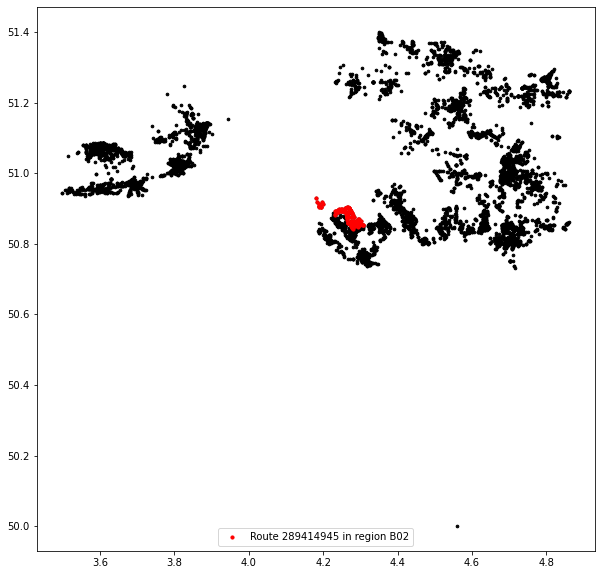

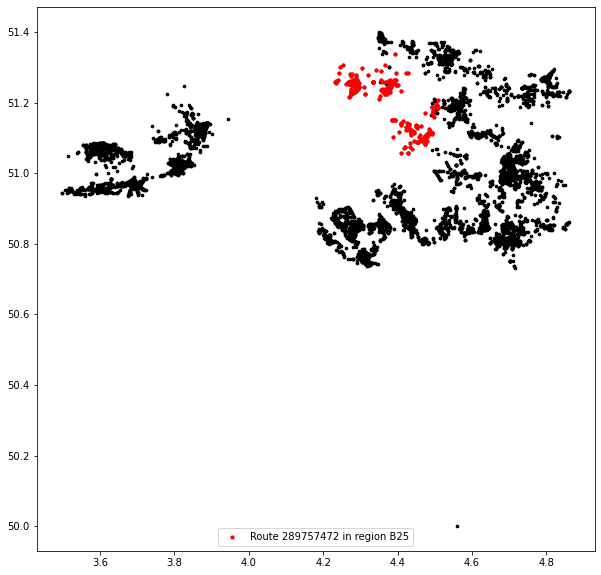

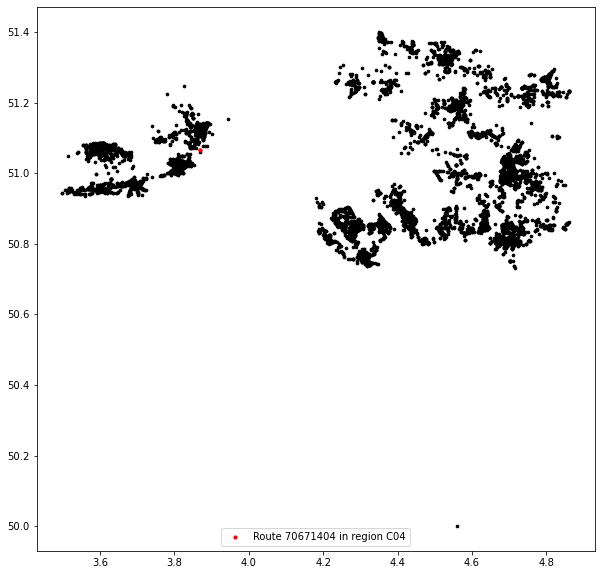

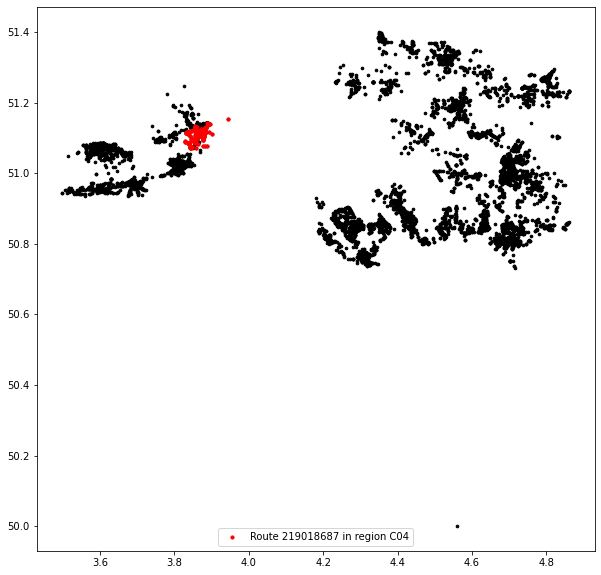

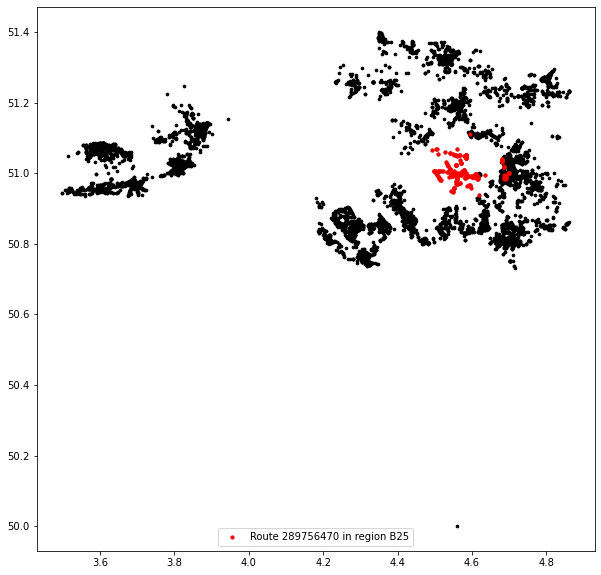

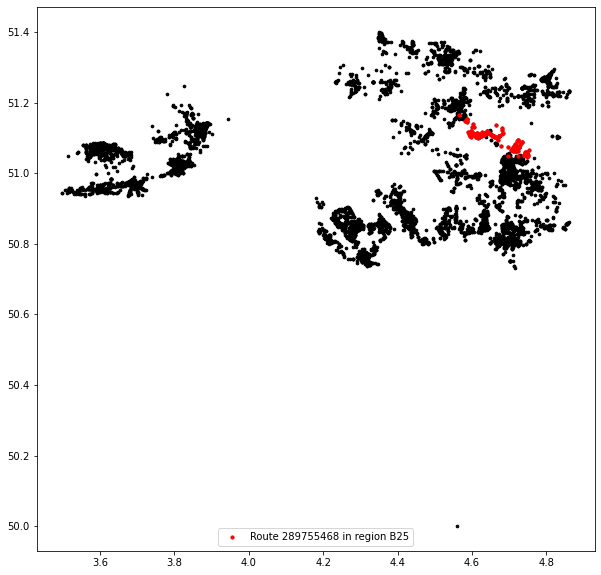

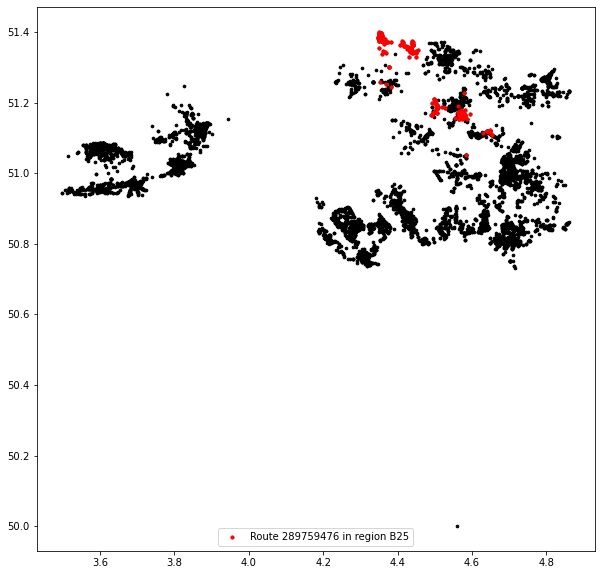

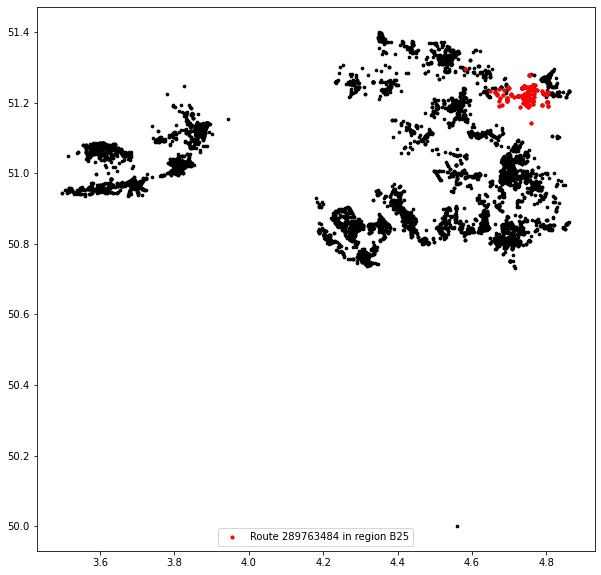

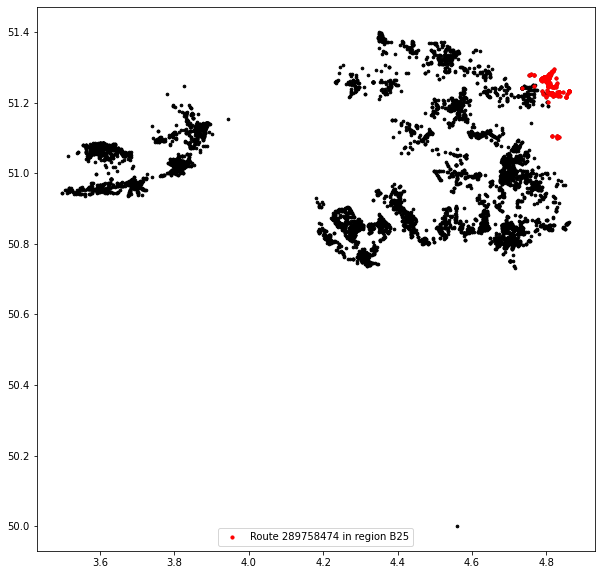

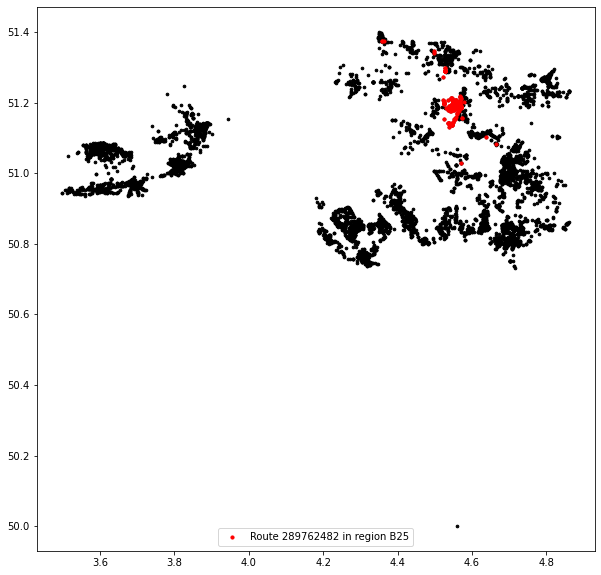

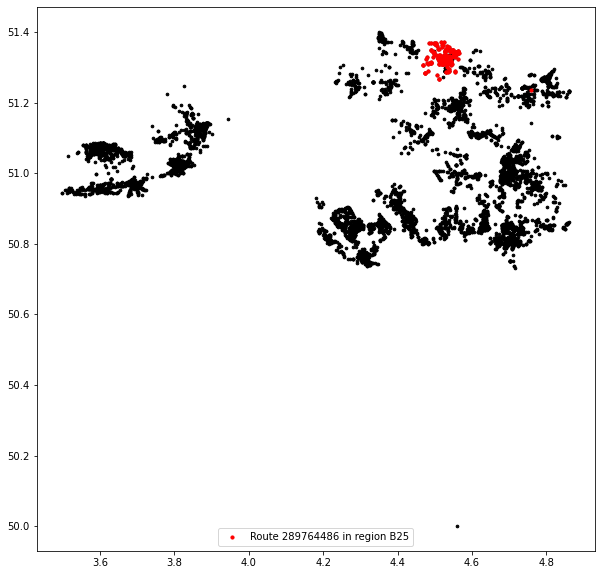

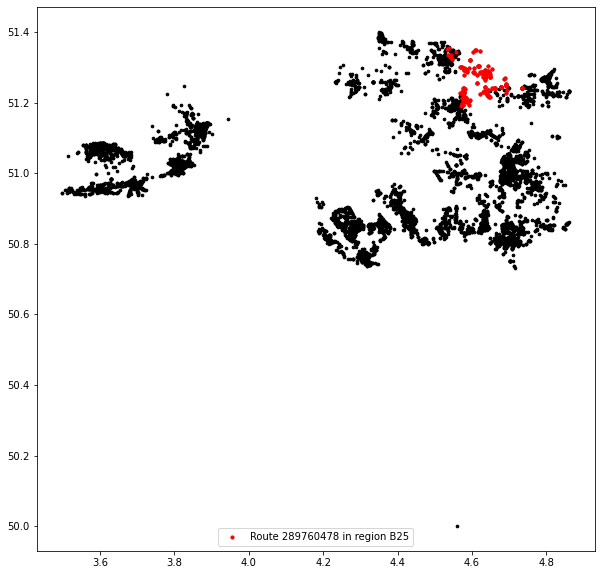

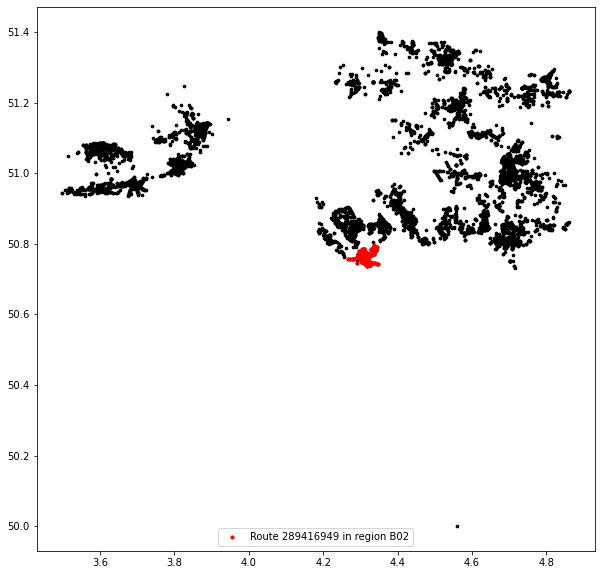

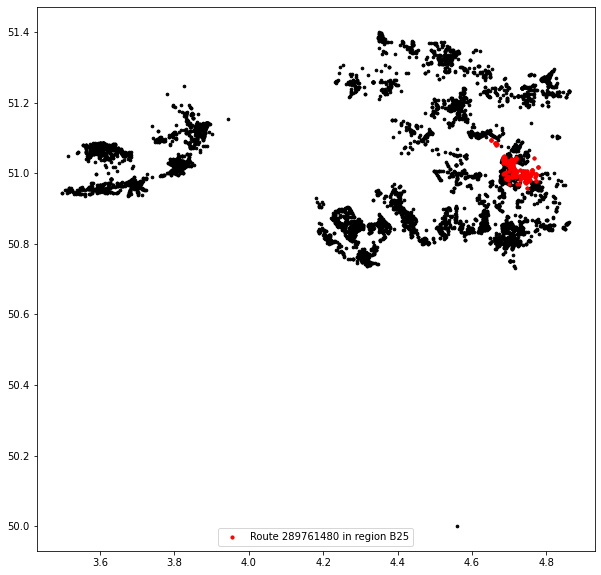

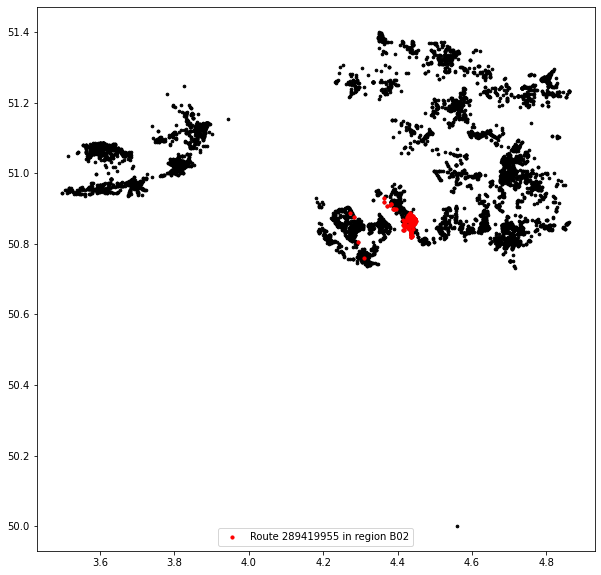

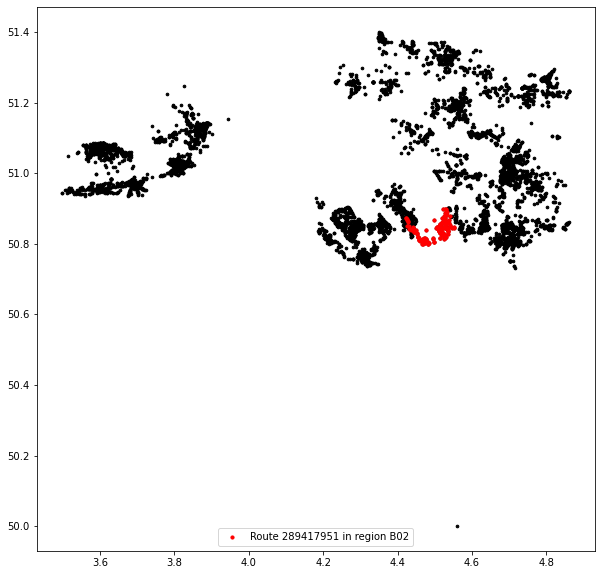

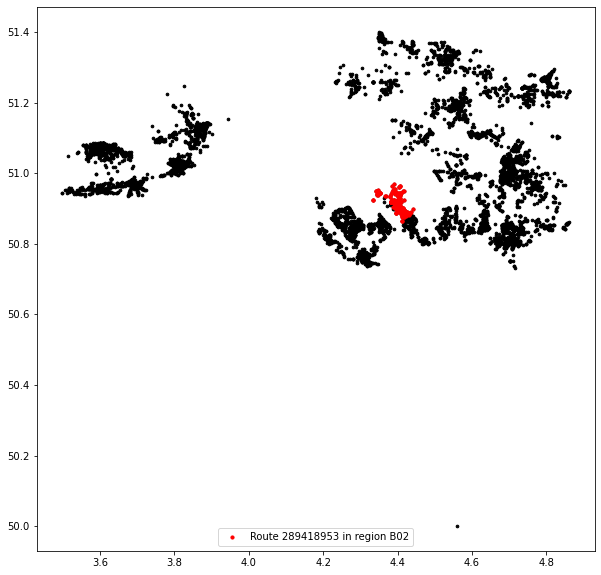

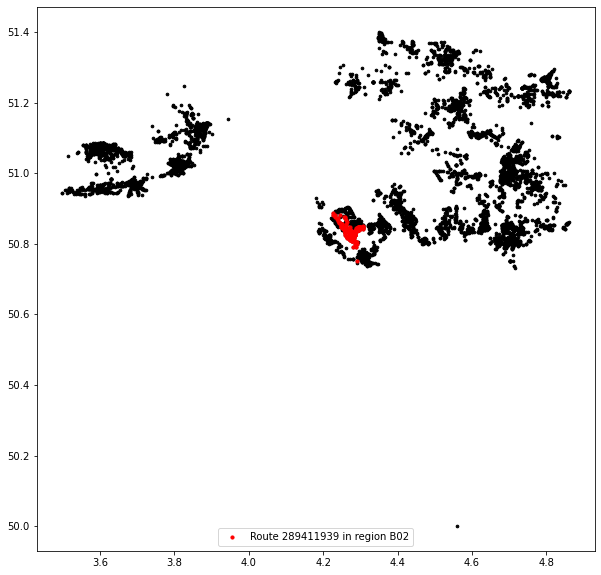

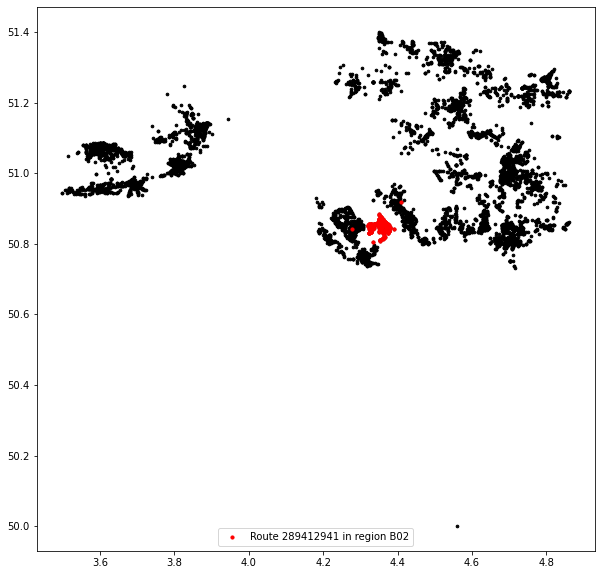

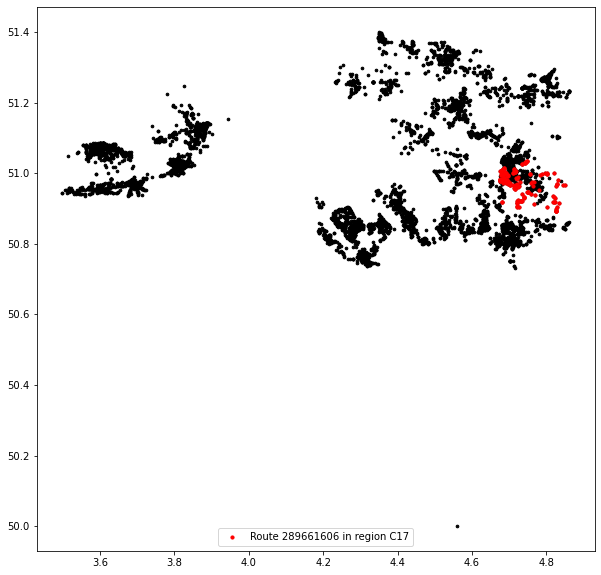

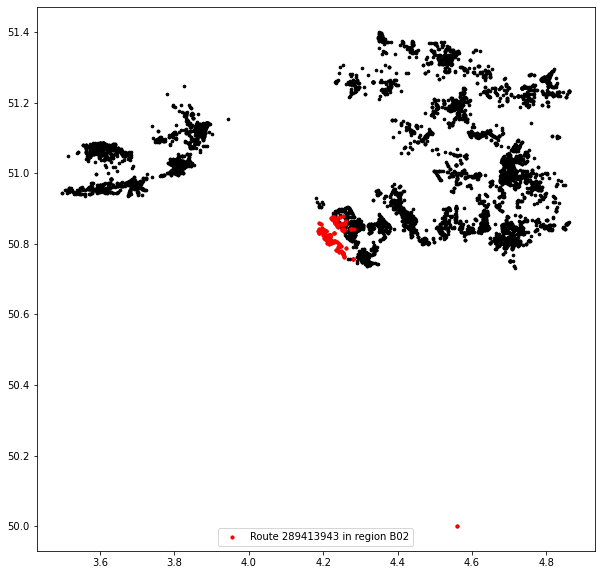

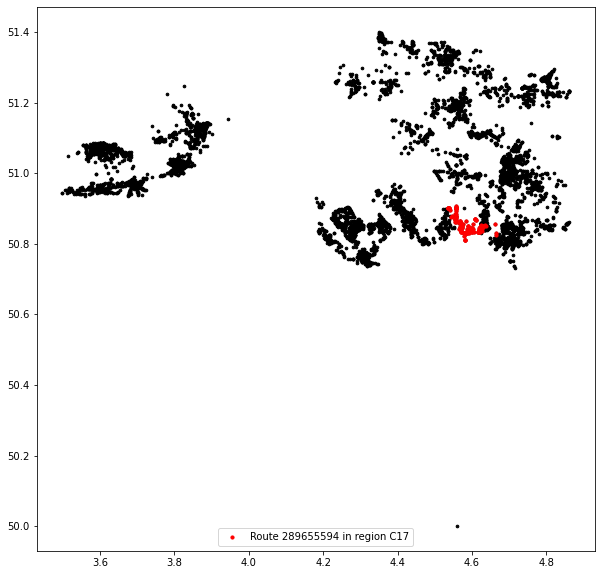

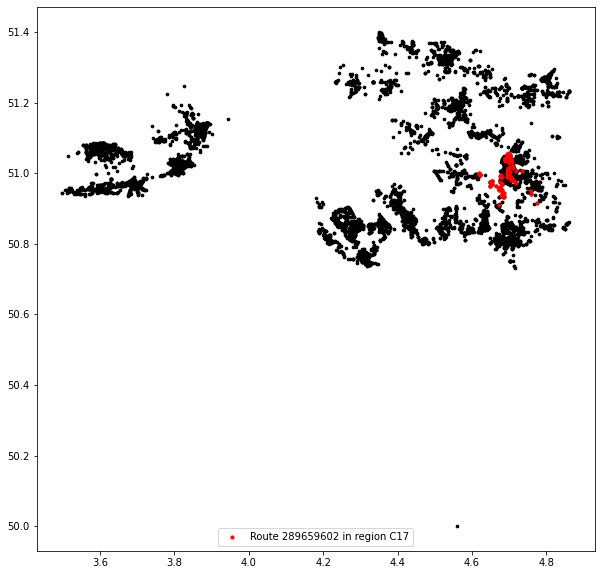

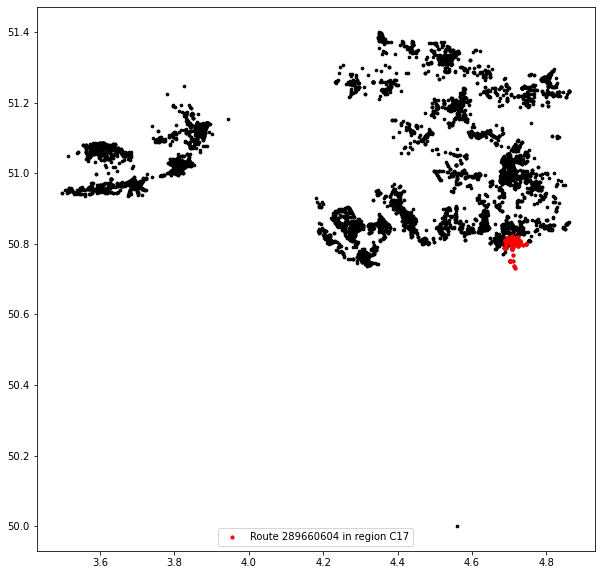

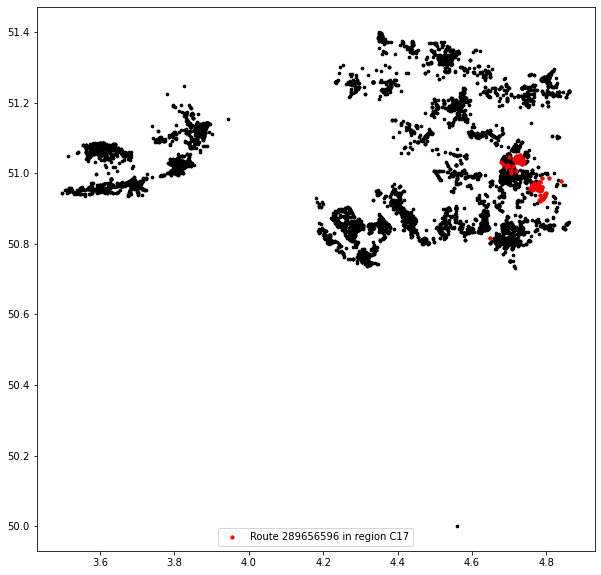

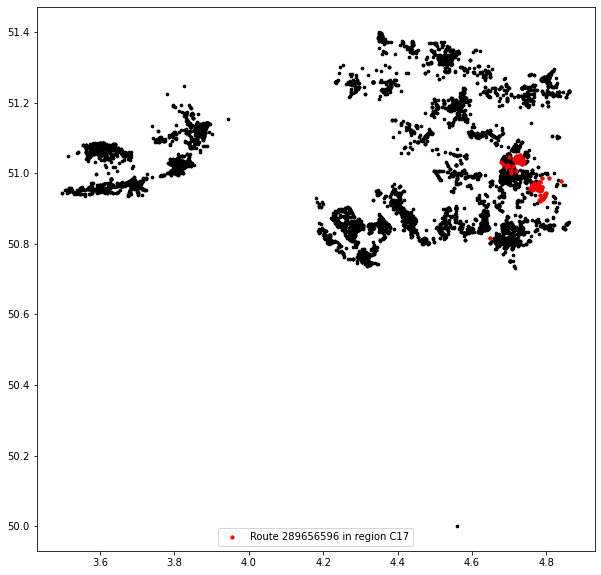

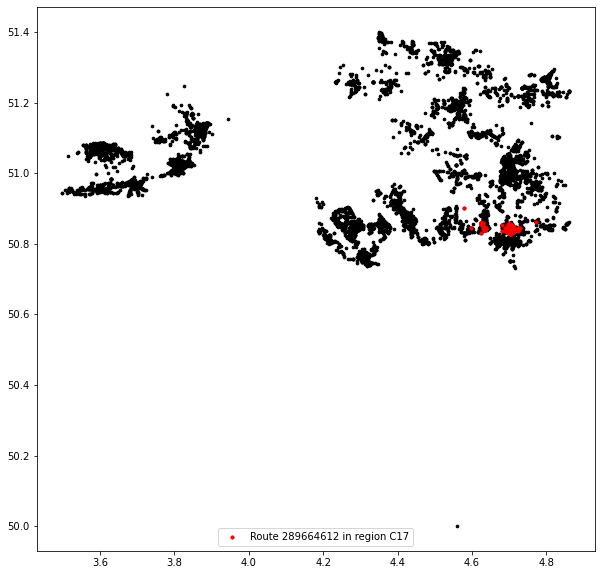

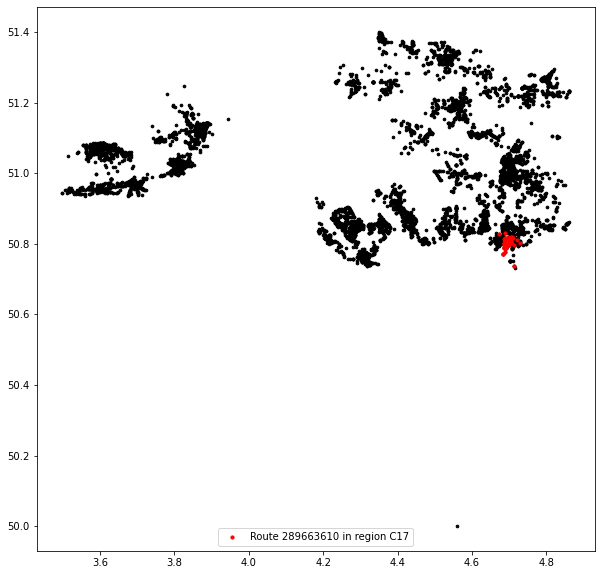

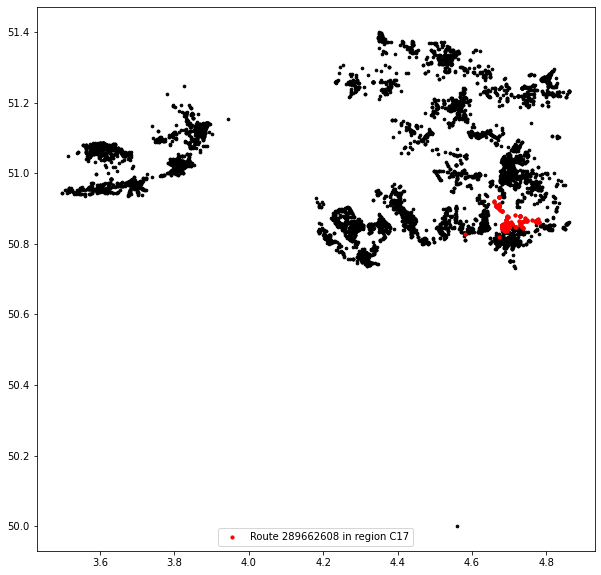

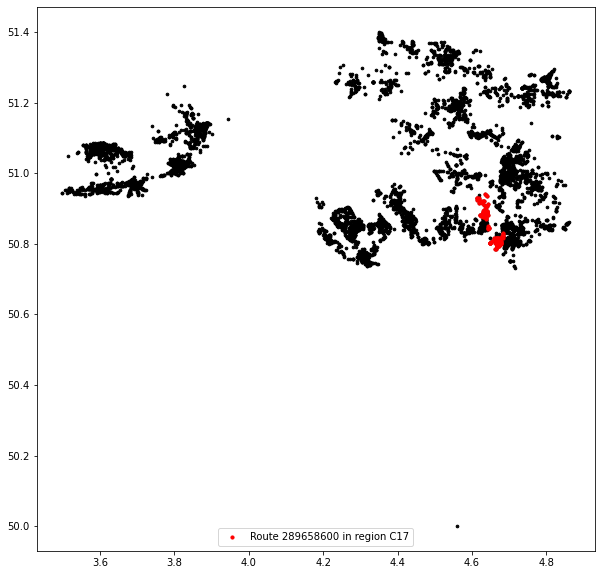

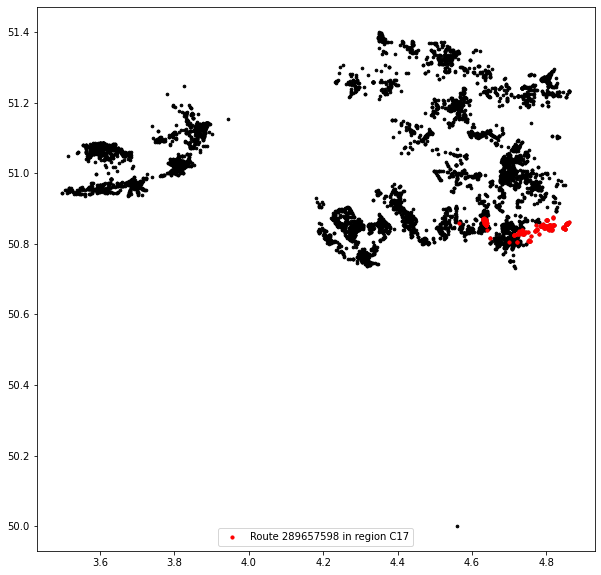

In [35]:
#Scatterplot where you can see the routes

hvc_depot_route = pd.merge(hvc_depot, hvc_hvroutetemplate)
cust_pos_region = pd.merge(hvc_hvroutetemplate,hvc_customer_regions2)

# join customer info with customer positions

dict_mean = {}

for routeid in hvc_depot_route["HVROUTETEMPLATE_NRID"]:
    all_cust_route = cust_pos_region[cust_pos_region["HVROUTETEMPLATE_NRID"] == routeid]
    plt.figure(figsize=(10, 10))
    plt.scatter(hvc_hvposition["LAT"], hvc_hvposition["LONG"], color="black", s = 7)
    plt.scatter(all_cust_route["LAT"], all_cust_route["LONG"], color="red", label="Route %s" %routeid + " in region %s" %cust_pos_region[cust_pos_region["HVROUTETEMPLATE_NRID"] == routeid]["REGION"].unique()[0],s = 10)
    
    #plt.scatter(np.mean(all_cust_route["LONG"]), np.mean(all_cust_route["LAT"]), color ="yellow")
    
    #dict_mean[routeid] = {np.mean(all_cust_route["LONG"]), np.mean(all_cust_route["LAT"])}
                
    
    plt.legend(loc="lower center")

#plt.savefig("./data/routes.jpeg")
plt.show()



## 2.10 Which depots should be removed? Where should the company create new depots?

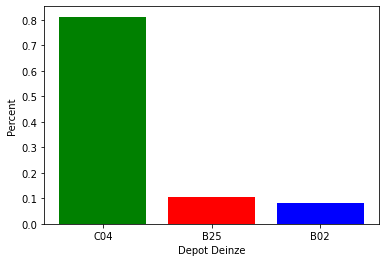

In [52]:
depot_df=pd.DataFrame(depot_per_region("Deinze"))

# get colors for each region
color_region = {"C04": "green", "B02": "blue", "B25": "red", "C17":  "yellow"}

cluster_region = [color_region[label] for label in depot_df.index]

plt.xlabel("Depot Deinze")
plt.ylabel("Percent")
plt.bar(depot_df.index, depot_df["REGION"], color = cluster_region)

#plt.savefig("./data/fig_Deinze")
plt.show()

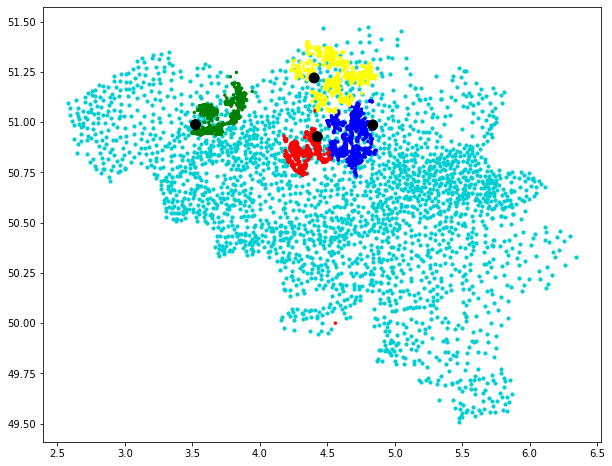

In [31]:
# initialize kmeans model with 4 clusters
km_model = KMeans(n_clusters=4)

# fit model on data
km_model.fit(hvc_hvposition[["LONG", "LAT"]])
plt.figure(figsize=(10, 8))

# get cluster labels for each customer
cluster_labels = km_model.predict(hvc_hvposition[["LONG", "LAT"]])

# define the colors for each cluster and a color for each customer
color_dict = {0: "yellow", 1: "green", 2: "red", 3 :'blue'}
cluster_colors = [color_dict[label] for label in cluster_labels]

# define the colors for each depot and a color for each depot
color_depot = {"Deinze": "black", "Antwerpen": "black", "Vilvoorde": "black", "Aarschot":  "black"}
cluster_depot = [color_depot[label] for label in data_depot["DEPOT"]]#in de juiste dataframe kijken om het depot te vinden

plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s= 10, color = "darkturquoise")
plt.scatter(hvc_hvposition["LAT"], hvc_hvposition["LONG"], color=cluster_colors, s=6)
plt.scatter(data_depot["Long"], data_depot["Lat"], color=cluster_depot, s = 100)

#plt.savefig("./data/fig_newregions_depots.jpeg")
plt.show()

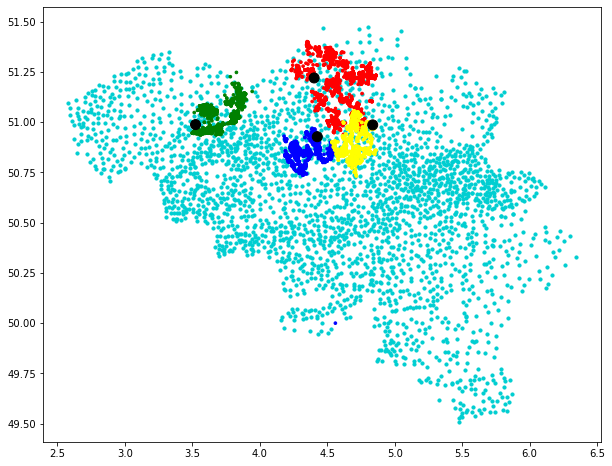

In [204]:
#Scatterplot with the regions and the depots
#Show the 4 regions in a scatterplot
plt.figure(figsize = (10,8))
plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s= 10, color = "darkturquoise")

# define color map
color_region = {"C04": "green", "B25": "red", "B02": "blue", "C17":  "yellow"}
color_depot = {"Deinze": "black", "Antwerpen": "black", "Vilvoorde": "black", "Aarschot":  "black"}

# get colors for each cluster label
cluster_region = [color_region[label] for label in hvc_customer_regions2["REGION"]]
cluster_depot = [color_depot[label] for label in data_depot["DEPOT"]]

# plot data with cluster colors
plt.scatter(hvc_customer_regions2["LAT"], hvc_customer_regions2["LONG"], color=cluster_region, s = 7)
plt.scatter(data_depot["Long"], data_depot["Lat"], color=cluster_depot, s = 100)

#plt.savefig("./data/fig_regions_depots.jpeg")
plt.show()


## 2.11 Which products should be added / removed from depots?

## 2.12 Does customer satisfaction relate to different factors? Can the company respond to these factors?

## 2.13 Does customer satisfaction relate to different factors? Can the company respond to these factors?

# 3 Extra Code

## 3.1 Net Promoter Score

In [ ]:
# NPS

## 3.2 Product Family 

In [60]:
# get the number of products in each product family
products_per_family = hvc_ar0.groupby("FAMILY")["AR0_NRID"].count().reset_index()

In [65]:
#making the correct table
hvc_ar0_visitresultdetails = pd.merge(hvc_ar0, hvc_visitresultdetails)
hvc_ar0_visitresultdetails

#calculating the revenue
revenue = hvc_ar0_visitresultdetails["QUANTITY"] * hvc_ar0_visitresultdetails["PRICE"]
hvc_ar0_visitresultdetails["REVENUE"] = revenue
agg_dict = {"REVENUE": np.sum}
hvc_revenue = hvc_ar0_visitresultdetails.groupby("AR0_NRID").agg(agg_dict)
hvc_revenue_top = hvc_revenue.sort_values("REVENUE", ascending = False).head(5)

agg_dict = {"REVENUE": np.sum}
hvc_revenue_family = hvc_ar0_visitresultdetails.groupby("FAMILY").agg(agg_dict)
hvc_revenue_sorted = hvc_revenue_family.sort_values("REVENUE", ascending = False)
hvc_revenue_sorted

,REVENUE
FAMILY,
Hand Ice,399042.2
Scoop Ice,279254.7
Cups,110634.7
Ice Cakes,62868.9
Assortments,61107.9
Individual Dessert,54172.2
Meals,39075.6
Coffee,31738.7
Garniture,13203.1


In [66]:
products_per_family.sort_values("AR0_NRID")
products_per_family_index = products_per_family.set_index("FAMILY").reindex(hvc_revenue_sorted.index)

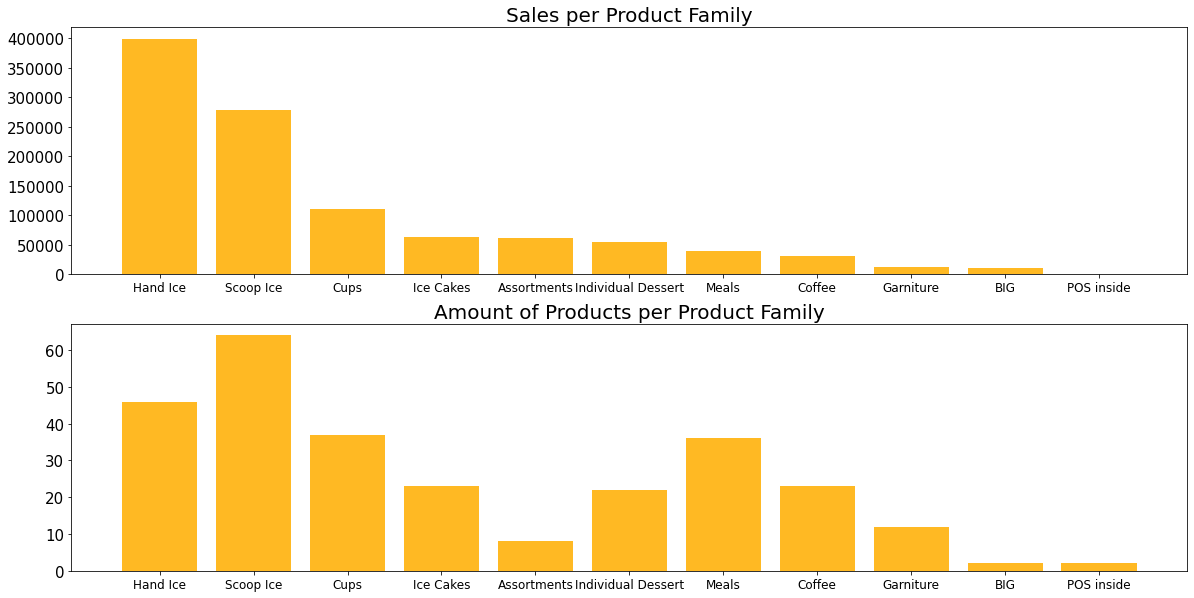

In [80]:
# create subplot
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
# plot barplot
plt.bar(x=range(11), height=hvc_revenue_sorted["REVENUE"], label = "Revenue", color = '#ffb923')
plt.set_color = ("#ffb923")
# set xticks
family_names = []
for index in hvc_revenue_sorted.index:
    family_names.append(index)
plt.xticks(range(11), family_names, fontsize = 12)
plt.yticks(fontsize = 15)
# define title
plt.title("Sales per Product Family", fontsize = 20)

plt.subplot(2,1,2)
# plot barplot
plt.bar(x=range(11), height=products_per_family_index["AR0_NRID"], label = "Products per family", color = '#ffb923')
plt.set_color = ("#ffb923")
# set xticks
plt.xticks(range(11), family_names, fontsize = 12)
plt.yticks(fontsize = 15)
# define title
plt.title("Amount of Products per Product Family", fontsize = 20)
plt.savefig('./data/productfamily.png')
plt.show()



In [68]:
# check the proportion of sold products

hvc_revenue_family

,REVENUE
FAMILY,
Assortments,61107.9
BIG,10240.0
Coffee,31738.7
Cups,110634.7
Garniture,13203.1
Hand Ice,399042.2
Ice Cakes,62868.9
Individual Dessert,54172.2
Meals,39075.6


In [69]:
#check the top products per family so we can drop certain products that do not generate enough
# sidenote with the graph about products per family and revenue per family

agg_dict = {'REVENUE': np.sum}
hvc_revenue_product = hvc_ar0_visitresultdetails.groupby('AR0_NRID').agg(agg_dict)

hvc_revenue_product_family = pd.merge(hvc_revenue_product,hvc_ar0, on = "AR0_NRID")
hvc_revenue_product_family = hvc_revenue_product_family[hvc_revenue_product_family['FAMILY'].notna()]

def topproductsperfamily(specificfamily):
    hvc_revenue_product_family_Specificfamily = hvc_revenue_product_family[hvc_revenue_product_family["FAMILY"] == specificfamily].sort_values("REVENUE", ascending = False)
    total_revenue_family = hvc_revenue_product_family[hvc_revenue_product_family["FAMILY"] == specificfamily]["REVENUE"].sum()
    frequency_family = []
    for index, row in hvc_revenue_product_family_Specificfamily.iterrows():
        frequency_family.append(round((100 * row.REVENUE)/total_revenue_family,2))
    hvc_revenue_product_family_Specificfamily["FREQUENCY_OF_REVENUE"] = frequency_family
    hvc_revenue_product_family_Specificfamily.set_index("AR0_NRID", inplace = True)
    return hvc_revenue_product_family_Specificfamily[["REVENUE", "FREQUENCY_OF_REVENUE"]]
scoop_ice = topproductsperfamily("Scoop Ice")
scoop_ice[scoop_ice["FREQUENCY_OF_REVENUE"] < 0.1]


,REVENUE,FREQUENCY_OF_REVENUE
AR0_NRID,,
290318679,258.3,0.09
23702,257.3,0.09
23704,166.0,0.06
23701,141.1,0.05
23703,107.9,0.04
17811288175050,49.8,0.02
18424244393052,33.2,0.01
23712,33.2,0.01
19864988676644,32.4,0.01


## 3.3 Recommendation Engine

#### Preparations

In [47]:
# deze functie komt uit ander document en mag eigenlijk weg
#making the necessary tables
hvc_visitresult_visitresultdetails_so0 = pd.merge(pd.merge(hvc_hvvisitresult, hvc_so0, on = "SO0_NRID"), hvc_visitresultdetails, on = "HVVISITRESULT_NRID")
hvc_visitresult_visitresultdetails_so0_ar0 = pd.merge(hvc_visitresult_visitresultdetails_so0, hvc_ar0, on = "AR0_NRID")
hvc_visitresult_visitresultdetails_so0_ar0_routetemplate = pd.merge(hvc_visitresult_visitresultdetails_so0_ar0, hvc_hvroutetemplate)
hvc_visitresult_visitresultdetails_so0_ar0_routetemplate
def productsregionfct(region):
    hvc_visitresult_visitresultdetails_so0_ar0_routetemplate_sortedquantity = hvc_visitresult_visitresultdetails_so0_ar0_routetemplate[hvc_visitresult_visitresultdetails_so0_ar0_routetemplate["REGION"] == region].sort_values(by = "QUANTITY")
    quantity_act= {"QUANTITY" : np.sum}
    quantity_grouped = hvc_visitresult_visitresultdetails_so0_ar0_routetemplate_sortedquantity.groupby("AR0_NRID").agg(quantity_act)
    quantity_grouped_top = quantity_grouped.sort_values(by = "QUANTITY", ascending = False).head(5)
    regionlist = []
    for index in quantity_grouped_top.index:
        regionlist.append(index)
    return regionlist

In [5]:
transactions_details_df = pd.merge(left=hvc_hvvisitresult, right=hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner")

In [6]:
# put the column "AR0_NRID" of hvc_visitresultdetails_correlatedproducts in a list 
# so that it is easier to work with

# get unique transactions
trans_ids = transactions_details_df["HVVISITRESULT_NRID"].unique().tolist()

# initialize container
trans_products = []

# loop through all the transactions
for trans_id in trans_ids:
    # get unique products that were bought during transaction
    products = transactions_details_df[transactions_details_df["HVVISITRESULT_NRID"] == trans_id]["AR0_NRID"].unique().tolist()
    # add to container
    trans_products.append(products)

In [8]:
#function to get the most correlated product of a product
def get_correlated_product(product_id):    
    # initialize empty container
    other_products = []
    # loop through the transactions
    for products in trans_products:
        # check if product_id was bought in transaction
            if product_id in products:
            # loop through the products that were bought in that transaction
                for product in products:
                    if product != product_id:
                        # add product to container
                        other_products.append(product)
    
    return mode(other_products)

In [12]:
# define a function that accepts a customer id, the transactions data, transactions details data and product data
def get_products_customer(cust_id):
    # join transactions with transaction details with products
    transactions_products = hvc_hvvisitresult.merge(hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner") \
                                        .merge(hvc_ar0, on="AR0_NRID", how="inner")
    # get transactions of customer 
    transactions_products_cust = transactions_products[transactions_products["SO0_NRID"] == cust_id]
    # only get transactions of succesfull visits
    transactions_products_cust = transactions_products_cust[transactions_products_cust["HVOUTCOME_NRID"] == 2]
    # return
    return transactions_products_cust["AR0_NRID"].unique()

In [18]:
#function to get the region of a customer based on the route he is in
def get_region_customer(customerid):
    #merge the correct df
    hvc_so0_routetemplate = pd.merge(hvc_so0, hvc_hvroutetemplate, on = "HVROUTETEMPLATE_NRID", how = "inner")
    #set the index for loc
    hvc_so0_routetemplate = hvc_so0_routetemplate.set_index("SO0_NRID")
    #get the region out of the df
    region = hvc_so0_routetemplate.loc[customerid]["REGION"]
    return region

In [17]:
#function to get correlated products of customer based on previous product purchases
def get_top_correlated_products(cust_id):
    #initialize local variables
    products = get_products_customer(cust_id)
    correlated_products = []
    #get correlated products out of function and list of bought products
    for product in products:
            correlated_products.append(get_correlated_product(product))
    correlated_products = np.unique(correlated_products)
    return correlated_products

In [31]:
#Make recency, freq and monetary value table of all customers
#Recency
rec = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 2].groupby("SO0_NRID")["DATEONLY"].max().reset_index()
rec["REC"] = rec["DATEONLY"].apply(lambda x: (datetime.datetime.now() - x).days)
rec = rec.drop("DATEONLY", axis = 1)

#Frequency
freq = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 2].groupby("SO0_NRID")["HVVISITRESULT_NRID"].count().reset_index()
freq = freq.rename(columns = {"HVVISITRESULT_NRID": "FREQ"})

#Monetary Value
mon = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 2].groupby("SO0_NRID")["AMOUNT"].sum().reset_index()
mon = mon.rename(columns = {"AMOUNT": "MON"})

#Join all the tables
cust_info = rec.merge(freq, on = "SO0_NRID", how = "inner").merge(mon, on = "SO0_NRID", how = "inner")

In [32]:
# define function to get most similar customer
def get_most_similar_cust(cust_id):
    try:
        # initialize cosine dist
        best_cos_sim = 0
        # initialize most similar cust
        sim_cust= None

        # get feature vector of customer
        feature_vector_x = np.array(cust_info[cust_info["SO0_NRID"] == cust_id][["MON", "FREQ", "REC"]])

        # loop through other customers 
        for i in range(len(cust_info)):

            # get cust id
            other_cust_id =int(cust_info["SO0_NRID"].iloc[i])

            # make sure we only get other customers
            if other_cust_id != cust_id:

                # get feature vector from other customer
                feature_vector_y = np.array(cust_info[cust_info["SO0_NRID"] == other_cust_id][["MON","FREQ","REC"]])
                # get cosine similarity
                cos_sim = cosine_similarity(feature_vector_x,feature_vector_y)[0][0]
                # check if similarity is higher than current highest similarity and update sim_cust and best_cost_sim
                if cos_sim > best_cos_sim:
                    best_cos_sim = cos_sim
                    sim_cust = other_cust_id

        # return cosine similarity and customer id
        return sim_cust
    except:
        return cust_id

In [33]:
def get_recommendedproducts_similarcust(cust_id):
    transactions_details_df = pd.merge(left=hvc_hvvisitresult, right=hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner")
    #get most similar customer
    similar_cust = get_most_similar_cust(cust_id)
    if(similar_cust != cust_id):
        # get all products bought by customer
        products_cust = set(transactions_details_df[transactions_details_df["SO0_NRID"] == cust_id]["AR0_NRID"])
        # get all products bought by most similar customer
        products_other_cust = set(transactions_details_df[transactions_details_df["SO0_NRID"] == similar_cust]["AR0_NRID"])
        # get products bought by most similar customer but not yet by customer
        return np.array(list(products_other_cust.difference(products_cust)))
    else:
        return cust_id

#### Engine

In [48]:
def recommendation_engine(cust_id):
    #initialize recommended products
    recommended_products = []
    #get best correlated products based on previous products
    correlated_products = get_top_correlated_products(cust_id)
    #get most bought products of region customer
    top_region_customer = productsregionfct(get_region_customer(cust_id))
    #get recommended products of most similar customer
    if(isinstance(get_recommendedproducts_similarcust, str)):
        return print("The customer is not visited")
    else:
        recommended_similar_cust = get_recommendedproducts_similarcust(cust_id)
        #check the sizes + check if there is an intercept between the arrays
        if(correlated_products.size != 0):
            if(np.intersect1d(np.intersect1d(correlated_products, recommended_similar_cust), top_region_customer).size != 0):
                recommended_products = np.intersect1d(np.intersect1d(correlated_products, recommended_similar_cust), top_region_customer)
                return print("Recommended products based on similar customers, region and correlated products:",recommended_products)
            else:
                print("There is no intersect with region, most corr products and similar customer products.")
                if((np.intersect1d(correlated_products, recommended_similar_cust).size != 0) & (np.intersect1d(correlated_products, top_region_customer).size != 0)):
                    recommended_products_simcust = np.intersect1d(correlated_products, recommended_similar_cust)
                    recommended_products_region = np.intersect1d(correlated_products, top_region_customer)
                    return print("Recommended products based on similar customers and correlated products:", recommended_products_simcust,"\nRecommended products based on region and correlated products:", recommended_products_region)
                elif(np.intersect1d(correlated_products, recommended_similar_cust).size != 0):
                    recommended_products = np.intersect1d(correlated_products, recommended_similar_cust)
                    return print("Recommended products based on similar customers and correlated products:",recommended_products)
                elif(np.intersect1d(correlated_products, top_region_customer).size != 0):
                    recommended_products = np.intersect1d(correlated_products, top_region_customer)
                    return print("Recommended products based on region and correlated products:",recommended_products)
        else:
            #customer did not buy anything, check region
            print("Customer did not buy anything, we recommend the regional products.")
            recommended_products = top_region_customer
            return print("Recommended products are:",recommended_products)

In [61]:
recommendation_engine(870975)

Recommended products based on similar customers, region and correlated products: [23716]


In [59]:
hvc_so0.iloc[1978]

SO0_NRID                   870975
HVROUTETEMPLATE_NRID    289763484
CUST_TYPE                 Private
POSTCODE                     3650
LANGUAGE                    nl-BE
SEASON_TYPE              All time
Name: 1978, dtype: object

In [ ]:
# import the packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
from collections import Counter
from statistics import mode
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

# 1 Import data

# import the data into pandas dataframes
hvc_am0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AM0.csv", sep=";")
hvc_ar0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AR0.csv", sep=";")
hvc_customer_reviews = pd.read_csv("../ACRM-GROUP-13/data/HVC_CUSTOMER_REVIEWS.csv", sep=";")
hvc_depot = pd.read_csv("../ACRM-GROUP-13/data/HVC_DEPOT.csv", sep=";")
hvc_hvdayofweek = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVDAYOFWEEK.csv", sep=";")
hvc_hvposition = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVPOSITION.csv", sep=";")
hvc_hvroutetemplate = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVROUTETEMPLATE.csv", sep=";")
hvc_hvvisitoutcome = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITOUTCOME.csv", sep=";")
hvc_hvvisitresult = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITRESULT.csv", sep=";")
hvc_so0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_SO0.csv", sep=";")
hvc_visitresultdetails = pd.read_csv("../ACRM-GROUP-13/data/HVC_VISITRESULTDETAILS.csv", sep=";")

#Data conversion
hvc_hvdayofweek["HVDAYOFWEEK_NRID"] = hvc_hvdayofweek["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"] = hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"] = hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["WEEKORDER"] = hvc_hvroutetemplate["WEEKORDER"].astype(int)
hvc_hvvisitoutcome["HVOUTCOME_NRID"] = hvc_hvvisitoutcome["HVOUTCOME_NRID"].astype(int)
hvc_visitresultdetails["HVVISITRESULT_NRID"] = hvc_visitresultdetails["HVVISITRESULT_NRID"].astype(int)
hvc_so0["SO0_NRID"] = hvc_so0["SO0_NRID"].astype(int)
hvc_so0["HVROUTETEMPLATE_NRID"] = hvc_so0["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvvisitresult["DATEONLY"] = pd.to_datetime(hvc_hvvisitresult["DATEONLY"])
hvc_hvvisitresult["VISITDATE"] = pd.to_datetime(hvc_hvvisitresult["VISITDATE"])

# 2 Advanced Analysis

## 2.1 Does the weather / seasonal changes have an effect on the total revenue?

# get the month of each transaction date and store it in new column
hvc_hvvisitresult["MONTH"] = hvc_hvvisitresult["DATEONLY"].apply(lambda x: x.month)

# get transactions from 2020 only
transactions_2019 = hvc_hvvisitresult[(hvc_hvvisitresult["DATEONLY"] >= pd.Timestamp(year=2019, day=1, month=1)) & (hvc_hvvisitresult["DATEONLY"] < pd.Timestamp(year=2020, month=1, day=1))]

# get transactions with succesfull outcome
transactions_2019 = transactions_2019[transactions_2019["HVOUTCOME_NRID"] == 2]

# get the total sales for each month
monthly_sales = transactions_2019.groupby("MONTH")["AMOUNT"].sum().reset_index()

# plot barplot

# define figure canvas
plt.figure(figsize=(8, 5))
# plot barplot
plt.bar(x=range(12), height=monthly_sales["AMOUNT"])
# set xticks as the first three letters of the name of each month
month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
plt.xticks(range(12), month_names)
# define title
plt.title("Monthly Sales of 2019")
plt.show()

## 2.2 Which customers should be rewarded?

# Ones with highest clv

## 2.3 Which employees should be rewarded?

# What are the routes of the employees?
hvc_hvvisitresult_so0 = pd.merge(hvc_hvvisitresult, hvc_so0)
hvc_hvvisitresult_so0

#What is the turnover for each employ?
hvc_am0_hvvisitresult = pd.merge(hvc_am0 , hvc_hvvisitresult)

agg_dict = {"AMOUNT": np.sum}
hvc_employee = hvc_am0_hvvisitresult.groupby("NAME").agg(agg_dict)
hvc_employee_sorted=hvc_employee.sort_values(by = "AMOUNT",ascending=False)

hvc_employee_sorted.head(5)

hvc_employee_sorted.tail(5)

hvc_employee_sorted

##the employees that generate the most revenue (>10000)

hvc_employee_sorted_rewarded = hvc_employee_sorted[hvc_employee_sorted["AMOUNT"]>10000.0]
hvc_employee_sorted_rewarded


# employees with excellent and good reviews

hvc_hvvisitresult_customer_reviews = pd.merge(hvc_hvvisitresult, hvc_customer_reviews)
hvc_hvvisitresult_customer_reviews

#aantal value_counts in een array
hvc_hvvisitresult_customer_reviews_counts = hvc_hvvisitresult_customer_reviews.value_counts("REVIEW")
hvc_hvvisitresult_customer_reviews_counts


hvc_am0_hvc_hvvisitresult_customer_reviews = pd.merge(hvc_am0 , hvc_hvvisitresult_customer_reviews)
#Alle waarden omzetten in getallen op een schaal van 4 
hvc_am0_hvc_hvvisitresult_customer_reviews_new = hvc_am0_hvc_hvvisitresult_customer_reviews.replace({"No opinion":2.5,"Very bad service, very unsatisfied":1,"Not completely satisfied":2,"Good service, satisfied":3,"Excellent service, very satisfied":4})
#Gemiddelde score + std berekenen per werknemer op 4
agg_dict = {"REVIEW":[np.mean,np.std,np.sum]}
hvc_am0_hvc_hvvisitresult_customer_reviews_new.groupby("NAME").agg(agg_dict)

#bar plots maken
plt.figure(figsize=(4,2))
plt.bar(range(5),hvc_hvvisitresult_customer_reviews_counts)
plt.xticks(range(5),hvc_hvvisitresult_customer_reviews["REVIEW"])
plt.xlabel("review")
plt.ylabel("amount")
plt.show()


## 2.4 To which customers should the company send coupons in order to win them back?

#Amount of customers that give a bad review and that need a coupon to win them back.

amount_bad_reviews = len(hvc_customer_reviews[hvc_customer_reviews["REVIEW"] == "Very bad service, very unsatisfied"]) + len(hvc_customer_reviews[hvc_customer_reviews["REVIEW"] == "Not completely satisfied"])

print(amount_bad_reviews)

# customers that give bad reviews

amount_bad_reviews

# customers that are visited but don’t buy anything
hvc_hvvisitresult_nothingneeded = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 0]
hvc_hvvisitresult_nothingneeded["SO0_NRID"].nunique()

hvc_hvvisitresult_nothingneeded

print(hvc_hvvisitresult_nothingneeded.groupby("SO0_NRID").agg({"HVVISITRESULT_NRID": np.absolute}))




#agg_dict = {"AR0_NRID": np.absolute}
#hvc_visitresultdetails_correlatedproducts = hvc_visitresultdetails.groupby("HVVISITRESULT_NRID").agg(agg_dict)

## 2.5 Are there factors that the company can change in order to decrease the churning rate?

def season_of_date(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Summer': pd.date_range(start='21/06/'+year, end='20/09/'+year),
               'Autumn': pd.date_range(start='21/09/'+year, end='20/12/'+year)}
    if date in seasons['Spring']:
        return 'Spring'
    if date in seasons['Summer']:
        return 'Summer'
    if date in seasons['Autumn']:
        return 'Autumn'
    else:
        return 'Winter'

#Check if the customer is visited at the right moment
#comparing amounts of open door but no purchase on a certain date with the preferred time for visits

hvc_hvvisitresult_nothingneeded.drop(axis = 1,labels = "PAYMENTTERM")

hvc_hvvisitresult_nothingneeded_so0 = pd.merge(hvc_hvvisitresult_nothingneeded, hvc_so0, on = "SO0_NRID")

hvc_hvvisitresult_nothingneeded_so0.drop(axis = 1, labels = "PAYMENTTERM")

#Christmas
hvc_hvvisitresult_nothingneeded_so0_christmas = hvc_hvvisitresult_nothingneeded_so0[hvc_hvvisitresult_nothingneeded_so0["SEASON_TYPE"] == "Christmas"]

christmas_false = []
for index, row in hvc_hvvisitresult_nothingneeded_so0_christmas.iterrows():
    if(row.DATEONLY.month != 12):
        christmas_false.append(index)
christmas_wrongproportion = int((len(christmas_false)/len(hvc_hvvisitresult_nothingneeded_so0_christmas)*100))
print("Christmas: ", christmas_wrongproportion)

#Function
def season_proportion(season):
    hvc_hvvisitresult_nothingneeded_so0_Season = hvc_hvvisitresult_nothingneeded_so0[hvc_hvvisitresult_nothingneeded_so0["SEASON_TYPE"] == season]

    Season_false = []
    for index, row in hvc_hvvisitresult_nothingneeded_so0_Season.iterrows():
        if(season_of_date(row.DATEONLY) == season):
            Season_false.append(index)
    Season_wrongproportion = int((len(Season_false)/len(hvc_hvvisitresult_nothingneeded_so0_Season)*100))
    print(season + ": ", Season_wrongproportion)
    return Season_wrongproportion
    
    
summer_wrongproportion = season_proportion("Summer")
winter_wrongproportion = season_proportion("Winter")

## Making a horizontal stacked bar chart
from matplotlib.colors import LinearSegmentedColormap

#making a df
data = [['Christmas', 100 - christmas_wrongproportion, christmas_wrongproportion], ['Winter', 100 - winter_wrongproportion, winter_wrongproportion], ['Summer', 100 - summer_wrongproportion, summer_wrongproportion]]
df = pd.DataFrame(data, columns = ['Season_Types', 'Wrong_Period',"Correct_Period"])

## making plot
ax = df.plot(kind='barh', stacked=True, figsize=(10, 10), color = ["green","red"])

for c in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.0f}%' if (w := v.get_width()) > 0 else '' for v in c ]
    
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center', fontsize = 16)
    
    
ax.legend(["Correct Period", "Wrong Period"],loc="upper left", fontsize = 11)
plt.xticks([0,20,40,60,80,100], fontsize = 16)
plt.yticks(np.arange(3), df["Season_Types"], fontsize = 16)
plt.savefig('./data/Correct_Visit_Period.png')
plt.show()

# Turnover customers
hvc_hvvisitresult_nothingneeded = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 0]
visit_turnover = (len(hvc_hvvisitresult_nothingneeded)/len(hvc_hvvisitresult))*100
visit_turnover

# check if the customer closed door is visited between 9 and 17

hvc_hvvisitresult_nothome = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 1]
hvc_hvvisitresult_nothome.drop(axis = 1,labels = "PAYMENTTERM")

Correct_Time = []
Wrong_Time = []

starttime= datetime.time(9,0,0)
endtime = datetime.time(17,0,0)

for index, row in hvc_hvvisitresult_nothome.iterrows():
    if(row.VISITDATE.time() > starttime and row.VISITDATE.time() < endtime):
        Wrong_Time.append(index)
Wrong_Time_proportion = int(100*(len(Wrong_Time)/len(hvc_hvvisitresult_nothome)))
print(Wrong_Time_proportion)

## 2.6 Would it be valuable to recommend (upsell / cross sell) products to a customer?

## 2.7 Which employees should be assigned to different routes?

#which employee is active in which region
hvc_customer_regions = pd.merge(hvc_so0,hvc_hvroutetemplate)
hvc_customer_regions2 = pd.merge(hvc_customer_regions, hvc_hvposition, on = "SO0_NRID")
hvc_customer_routes = pd.merge(hvc_hvroutetemplate, hvc_so0)
hvc_employee_route_region = pd.merge(pd.merge(hvc_so0, hvc_hvroutetemplate, on = "HVROUTETEMPLATE_NRID"), hvc_hvvisitresult)
hvc_routes_per_employeename = pd.merge(hvc_employee_route_region, hvc_am0)

agg_dict = {"REGION": np.unique}
hvc_employee_route_region_grouped = hvc_employee_route_region.groupby("AM0_NRID").agg(agg_dict)
hvc_employee_region_name = pd.merge(hvc_employee_route_region_grouped, hvc_am0, on = "AM0_NRID")

hvc_employee_region_name[["NAME", "REGION"]]


#employee x has route x that is in region x
hvc_employee_routeinregion_onname= pd.merge(hvc_employee_route_region, hvc_am0, on = "AM0_NRID")#["REGION"].value_counts()

def getroutesofemployee(employee):
    routes_of_employee = hvc_employee_routeinregion_onname[hvc_employee_routeinregion_onname["NAME"] == employee][["HVROUTETEMPLATE_NRID","REGION"]]["REGION"].value_counts()
    return routes_of_employee

getroutesofemployee("PAUWELS Jeffrey")

#Which routes belong to which region
agg_dict = {"REGION": np.unique}
hvc_customer_regions3_grouped = hvc_customer_routes.groupby("HVROUTETEMPLATE_NRID").agg(agg_dict)

def getregionofroute(route):
    region = hvc_customer_regions3_grouped[hvc_customer_regions3_grouped.index == route]["REGION"]
    return region

getregionofroute(219018687)

#all the routes of all the employees who are active
hvc_employee_routeinregion_onname_grouped = hvc_employee_routeinregion_onname.groupby("NAME")["HVROUTETEMPLATE_NRID"].unique()
hvc_employee_routeinregion_onname_grouped

## 2.8 Which routes should be reassigned to different depots?

hvc_routes_per_employeename[["HVROUTETEMPLATE_NRID", "AM0_NRID"]]

route_id = 289416949
employee_id = 18934048107254

cust_routes = pd.merge(hvc_hvposition, hvc_so0)

cust_route_location = cust_routes[cust_routes["HVROUTETEMPLATE_NRID"] == route_id][["LONG", "LAT"]].drop_duplicates()

belgium_df = pd.read_csv("./data/zipcode-belgium.csv", header = None)
belgium_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]


## 2.9 Which customers should be reassigned to different routes?

var Geographic  = new OpenLayers.Projection("EPSG:4326"); 
var Mercator = new OpenLayers.Projection("EPSG:900913");


function distanceBetweenPoints(latlng1, latlng2){
        var point1 = new OpenLayers.Geometry.Point(latlng1.lon, latlng1.lat).transform(Geographic, Mercator);
        var point2 = new OpenLayers.Geometry.Point(latlng2.lon, latlng2.lat).transform(Geographic, Mercator);       
        return point1.distanceTo(point2);
    }

## 2.10 Which depots should be removed? Where should the company create new depots?

belgium_df = pd.read_csv("./data/zipcode-belgium.csv", header = None)
belgium_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]

belgium_df = pd.read_csv("./data/zipcode-belgium.csv", header = None)
belgium_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]

#Scatterplot with the regions and the depots

#long and lat
#Deinze: 50.590 , 3.3138
#Antwerpen: 51.13, 4.24
#Vilvoorde : 50.56, 4,25
#Aarschot: 50.59, 4.50

#Show the 4 regions in a scatterplotx
plt.figure(figsize = (10,8))
plt.scatter(belgium_df["LONG"], belgium_df["LAT"], s= 10, color = "darkturquoise")
# define color map
color_region = {"C04": "green", "B25": "red", "B02": "blue", "C17":  "yellow"}

# get colors for each cluster label
cluster_region = [color_region[label] for label in hvc_customer_regions2["REGION"]]

# plot data with cluster colors
plt.scatter(hvc_customer_regions2["LAT"], hvc_customer_regions2["LONG"], color=cluster_region, s = 7)
#plt.savefig("./data/fig_region.pdf")

# define color map
color_depot = {"Deinze": "black", "Antwerpen": "black", "Vilvoorde": "black", "Aarschot":  "black"}

# get colors for each cluster label
cluster_depot = [color_depot[label] for label in data_depot["DEPOT"]]#in de juiste dataframe kijken om het depot te vinden


# plot data with cluster colors
plt.scatter(data_depot["Long"], data_depot["Lat"], color=cluster_depot, s = 100)

#Wil hier nog een legende bijplaatsen maar weet niet hoe
#plt.legend(["green","blue", "red", "yellow"])

plt.show()




## 2.11 Which products should be added / removed from depots?

## 2.12 Does customer satisfaction relate to different factors? Can the company respond to these factors?

## 2.13 Does customer satisfaction relate to different factors? Can the company respond to these factors?

# 3 Extra Code

## 3.1 Net Promoter Score

# NPS

## 3.2 Product Family 

# get the number of products in each product family
products_per_family = hvc_ar0.groupby("FAMILY")["AR0_NRID"].count().reset_index()

#making the correct table
hvc_ar0_visitresultdetails = pd.merge(hvc_ar0, hvc_visitresultdetails)
hvc_ar0_visitresultdetails

#calculating the revenue
revenue = hvc_ar0_visitresultdetails["QUANTITY"] * hvc_ar0_visitresultdetails["PRICE"]
hvc_ar0_visitresultdetails["REVENUE"] = revenue
agg_dict = {"REVENUE": np.sum}
hvc_revenue = hvc_ar0_visitresultdetails.groupby("AR0_NRID").agg(agg_dict)
hvc_revenue_top = hvc_revenue.sort_values("REVENUE", ascending = False).head(5)

agg_dict = {"REVENUE": np.sum}
hvc_revenue_family = hvc_ar0_visitresultdetails.groupby("FAMILY").agg(agg_dict)
hvc_revenue_sorted = hvc_revenue_family.sort_values("REVENUE", ascending = False)
hvc_revenue_sorted

products_per_family.sort_values("AR0_NRID")
products_per_family_index = products_per_family.set_index("FAMILY").reindex(hvc_revenue_sorted.index)

# create subplot
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
# plot barplot
plt.bar(x=range(11), height=hvc_revenue_sorted["REVENUE"], label = "Revenue", color = '#ffb923')
plt.set_color = ("#ffb923")
# set xticks
family_names = []
for index in hvc_revenue_sorted.index:
    family_names.append(index)
plt.xticks(range(11), family_names, fontsize = 12)
plt.yticks(fontsize = 15)
# define title
plt.title("Sales per Product Family", fontsize = 20)

plt.subplot(2,1,2)
# plot barplot
plt.bar(x=range(11), height=products_per_family_index["AR0_NRID"], label = "Products per family", color = '#ffb923')
plt.set_color = ("#ffb923")
# set xticks
plt.xticks(range(11), family_names, fontsize = 12)
plt.yticks(fontsize = 15)
# define title
plt.title("Amount of Products per Product Family", fontsize = 20)
plt.savefig('./data/productfamily.png')
plt.show()





# check the proportion of sold products

hvc_revenue_family

#check the top products per family so we can drop certain products that do not generate enough
# sidenote with the graph about products per family and revenue per family

agg_dict = {'REVENUE': np.sum}
hvc_revenue_product = hvc_ar0_visitresultdetails.groupby('AR0_NRID').agg(agg_dict)

hvc_revenue_product_family = pd.merge(hvc_revenue_product,hvc_ar0, on = "AR0_NRID")
hvc_revenue_product_family = hvc_revenue_product_family[hvc_revenue_product_family['FAMILY'].notna()]

def topproductsperfamily(specificfamily):
    hvc_revenue_product_family_Specificfamily = hvc_revenue_product_family[hvc_revenue_product_family["FAMILY"] == specificfamily].sort_values("REVENUE", ascending = False)
    total_revenue_family = hvc_revenue_product_family[hvc_revenue_product_family["FAMILY"] == specificfamily]["REVENUE"].sum()
    frequency_family = []
    for index, row in hvc_revenue_product_family_Specificfamily.iterrows():
        frequency_family.append(round((100 * row.REVENUE)/total_revenue_family,2))
    hvc_revenue_product_family_Specificfamily["FREQUENCY_OF_REVENUE"] = frequency_family
    hvc_revenue_product_family_Specificfamily.set_index("AR0_NRID", inplace = True)
    return hvc_revenue_product_family_Specificfamily[["REVENUE", "FREQUENCY_OF_REVENUE"]]
scoop_ice = topproductsperfamily("Scoop Ice")
scoop_ice[scoop_ice["FREQUENCY_OF_REVENUE"] < 0.1]


## 3.3 Recommendation Engine

#### Preparations

# deze functie komt uit ander document en mag eigenlijk weg
#making the necessary tables
hvc_visitresult_visitresultdetails_so0 = pd.merge(pd.merge(hvc_hvvisitresult, hvc_so0, on = "SO0_NRID"), hvc_visitresultdetails, on = "HVVISITRESULT_NRID")
hvc_visitresult_visitresultdetails_so0_ar0 = pd.merge(hvc_visitresult_visitresultdetails_so0, hvc_ar0, on = "AR0_NRID")
hvc_visitresult_visitresultdetails_so0_ar0_routetemplate = pd.merge(hvc_visitresult_visitresultdetails_so0_ar0, hvc_hvroutetemplate)
hvc_visitresult_visitresultdetails_so0_ar0_routetemplate
def productsregionfct(region):
    hvc_visitresult_visitresultdetails_so0_ar0_routetemplate_sortedquantity = hvc_visitresult_visitresultdetails_so0_ar0_routetemplate[hvc_visitresult_visitresultdetails_so0_ar0_routetemplate["REGION"] == region].sort_values(by = "QUANTITY")
    quantity_act= {"QUANTITY" : np.sum}
    quantity_grouped = hvc_visitresult_visitresultdetails_so0_ar0_routetemplate_sortedquantity.groupby("AR0_NRID").agg(quantity_act)
    quantity_grouped_top = quantity_grouped.sort_values(by = "QUANTITY", ascending = False).head(5)
    regionlist = []
    for index in quantity_grouped_top.index:
        regionlist.append(index)
    return regionlist

transactions_details_df = pd.merge(left=hvc_hvvisitresult, right=hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner")

# put the column "AR0_NRID" of hvc_visitresultdetails_correlatedproducts in a list 
# so that it is easier to work with

# get unique transactions
trans_ids = transactions_details_df["HVVISITRESULT_NRID"].unique().tolist()

# initialize container
trans_products = []

# loop through all the transactions
for trans_id in trans_ids:
    # get unique products that were bought during transaction
    products = transactions_details_df[transactions_details_df["HVVISITRESULT_NRID"] == trans_id]["AR0_NRID"].unique().tolist()
    # add to container
    trans_products.append(products)

#function to get the most correlated product of a product
def get_correlated_product(product_id):    
    # initialize empty container
    other_products = []
    # loop through the transactions
    for products in trans_products:
        # check if product_id was bought in transaction
            if product_id in products:
            # loop through the products that were bought in that transaction
                for product in products:
                    if product != product_id:
                        # add product to container
                        other_products.append(product)
    
    return mode(other_products)

# define a function that accepts a customer id, the transactions data, transactions details data and product data
def get_products_customer(cust_id):
    # join transactions with transaction details with products
    transactions_products = hvc_hvvisitresult.merge(hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner") \
                                        .merge(hvc_ar0, on="AR0_NRID", how="inner")
    # get transactions of customer 
    transactions_products_cust = transactions_products[transactions_products["SO0_NRID"] == cust_id]
    # only get transactions of succesfull visits
    transactions_products_cust = transactions_products_cust[transactions_products_cust["HVOUTCOME_NRID"] == 2]
    # return
    return transactions_products_cust["AR0_NRID"].unique()

#function to get the region of a customer based on the route he is in
def get_region_customer(customerid):
    #merge the correct df
    hvc_so0_routetemplate = pd.merge(hvc_so0, hvc_hvroutetemplate, on = "HVROUTETEMPLATE_NRID", how = "inner")
    #set the index for loc
    hvc_so0_routetemplate = hvc_so0_routetemplate.set_index("SO0_NRID")
    #get the region out of the df
    region = hvc_so0_routetemplate.loc[customerid]["REGION"]
    return region

#function to get correlated products of customer based on previous product purchases
def get_top_correlated_products(cust_id):
    #initialize local variables
    products = get_products_customer(cust_id)
    correlated_products = []
    #get correlated products out of function and list of bought products
    for product in products:
            correlated_products.append(get_correlated_product(product))
    correlated_products = np.unique(correlated_products)
    return correlated_products

#Make recency, freq and monetary value table of all customers
#Recency
rec = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 2].groupby("SO0_NRID")["DATEONLY"].max().reset_index()
rec["REC"] = rec["DATEONLY"].apply(lambda x: (datetime.datetime.now() - x).days)
rec = rec.drop("DATEONLY", axis = 1)

#Frequency
freq = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 2].groupby("SO0_NRID")["HVVISITRESULT_NRID"].count().reset_index()
freq = freq.rename(columns = {"HVVISITRESULT_NRID": "FREQ"})

#Monetary Value
mon = hvc_hvvisitresult[hvc_hvvisitresult["HVOUTCOME_NRID"] == 2].groupby("SO0_NRID")["AMOUNT"].sum().reset_index()
mon = mon.rename(columns = {"AMOUNT": "MON"})

#Join all the tables
cust_info = rec.merge(freq, on = "SO0_NRID", how = "inner").merge(mon, on = "SO0_NRID", how = "inner")

# define function to get most similar customer
def get_most_similar_cust(cust_id):
    try:
        # initialize cosine dist
        best_cos_sim = 0
        # initialize most similar cust
        sim_cust= None

        # get feature vector of customer
        feature_vector_x = np.array(cust_info[cust_info["SO0_NRID"] == cust_id][["MON", "FREQ", "REC"]])

        # loop through other customers 
        for i in range(len(cust_info)):

            # get cust id
            other_cust_id =int(cust_info["SO0_NRID"].iloc[i])

            # make sure we only get other customers
            if other_cust_id != cust_id:

                # get feature vector from other customer
                feature_vector_y = np.array(cust_info[cust_info["SO0_NRID"] == other_cust_id][["MON","FREQ","REC"]])
                # get cosine similarity
                cos_sim = cosine_similarity(feature_vector_x,feature_vector_y)[0][0]
                # check if similarity is higher than current highest similarity and update sim_cust and best_cost_sim
                if cos_sim > best_cos_sim:
                    best_cos_sim = cos_sim
                    sim_cust = other_cust_id

        # return cosine similarity and customer id
        return sim_cust
    except:
        return cust_id

def get_recommendedproducts_similarcust(cust_id):
    transactions_details_df = pd.merge(left=hvc_hvvisitresult, right=hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner")
    #get most similar customer
    similar_cust = get_most_similar_cust(cust_id)
    if(similar_cust != cust_id):
        # get all products bought by customer
        products_cust = set(transactions_details_df[transactions_details_df["SO0_NRID"] == cust_id]["AR0_NRID"])
        # get all products bought by most similar customer
        products_other_cust = set(transactions_details_df[transactions_details_df["SO0_NRID"] == similar_cust]["AR0_NRID"])
        # get products bought by most similar customer but not yet by customer
        return np.array(list(products_other_cust.difference(products_cust)))
    else:
        return cust_id

#### Engine

def recommendation_engine(cust_id):
    #initialize recommended products
    recommended_products = []
    #get best correlated products based on previous products
    correlated_products = get_top_correlated_products(cust_id)
    #get most bought products of region customer
    top_region_customer = productsregionfct(get_region_customer(cust_id))
    #get recommended products of most similar customer
    if(isinstance(get_recommendedproducts_similarcust, str)):
        return print("The customer is not visited")
    else:
        recommended_similar_cust = get_recommendedproducts_similarcust(cust_id)
        #check the sizes + check if there is an intercept between the arrays
        if(correlated_products.size != 0):
            if(np.intersect1d(np.intersect1d(correlated_products, recommended_similar_cust), top_region_customer).size != 0):
                recommended_products = np.intersect1d(np.intersect1d(correlated_products, recommended_similar_cust), top_region_customer)
                return print("Recommended products based on similar customers, region and correlated products:",recommended_products)
            else:
                print("There is no intersect with region, most corr products and similar customer products.")
                if((np.intersect1d(correlated_products, recommended_similar_cust).size != 0) & (np.intersect1d(correlated_products, top_region_customer).size != 0)):
                    recommended_products_simcust = np.intersect1d(correlated_products, recommended_similar_cust)
                    recommended_products_region = np.intersect1d(correlated_products, top_region_customer)
                    return print("Recommended products based on similar customers and correlated products:", recommended_products_simcust,"\nRecommended products based on region and correlated products:", recommended_products_region)
                elif(np.intersect1d(correlated_products, recommended_similar_cust).size != 0):
                    recommended_products = np.intersect1d(correlated_products, recommended_similar_cust)
                    return print("Recommended products based on similar customers and correlated products:",recommended_products)
                elif(np.intersect1d(correlated_products, top_region_customer).size != 0):
                    recommended_products = np.intersect1d(correlated_products, top_region_customer)
                    return print("Recommended products based on region and correlated products:",recommended_products)
        else:
            #customer did not buy anything, check region
            print("Customer did not buy anything, we recommend the regional products.")
            recommended_products = top_region_customer
            return print("Recommended products are:",recommended_products)

recommendation_engine(870975)

hvc_so0.iloc[1978]

